## 1. Setup and Data Loading

In [3]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.2f}'.format)

# Set plot style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')

print("✅ Libraries imported successfully")

✅ Libraries imported successfully


In [4]:
# Load the merged output data for resource analysis
file = '../output/2.csv'

df = pd.read_csv(file)

# Load output.csv for time series trend analysis (has better time granularity)
df_trends = pd.read_csv(file)

# Display basic information
print(f"📊 Main Dataset Shape: {df.shape[0]:,} rows x {df.shape[1]} columns")
print(f"📊 Trends Dataset Shape: {df_trends.shape[0]:,} rows x {df_trends.shape[1]} columns")
print(f"\n📅 Main Date Range: {df['timeUsageStarted'].min()} to {df['timeUsageEnded'].max()}")
print(f"📅 Trends Date Range: {df_trends['timeUsageStarted'].min()} to {df_trends['timeUsageEnded'].max()}")
print(f"\n💰 Total Cost (Main): ${df['computedAmount'].sum():,.2f}")
print(f"💰 Total Cost (Trends): ${df_trends['computedAmount'].sum():,.2f}")

# Show first few rows
df.head()

📊 Main Dataset Shape: 6,442 rows x 36 columns
📊 Trends Dataset Shape: 6,442 rows x 36 columns

📅 Main Date Range: 2025-04-01T00:00:00.000Z to 2025-06-30T00:00:00.000Z
📅 Trends Date Range: 2025-04-01T00:00:00.000Z to 2025-06-30T00:00:00.000Z

💰 Total Cost (Main): $107,212.29
💰 Total Cost (Trends): $107,212.29


,ad,attributedCost,attributedUsage,compartmentId,compartmentName,compartmentPath,computedAmount,computedQuantity,currency,discount,isForecast,listRate,overage,overagesFlag,platform,region,resourceId,resourceName,service,shape,skuName,skuPartNumber,subscriptionId,tags,tenantId,tenantName,timeUsageEnded,timeUsageStarted,unit,unitPrice,weight,platform_from_call2,region_from_call2,skuPartNumber_from_call2,shape_from_call2,resourceName_from_call2
0,NaN,57.19,47.28,NaN,NaN,acfin/PROCESOS,0.00,0.00,USD,NaN,False,NaN,NaN,NaN,NaN,NaN,ocid1.pluggabledatabase.oc1.phx.anyhqljtknk552...,NaN,Database,NaN,Database Exadata XP - Additional OCPUs,NaN,NaN,"[{'key': None, 'namespace': None, 'value': None}]",NaN,NaN,2025-06-30T00:00:00.000Z,2025-06-29T00:00:00.000Z,NaN,NaN,NaN,GEN_2,us-phoenix-1,B88592,NaN,NaN
1,NaN,0.00,144.00,NaN,NaN,acfin/PROCESOS,0.00,144.00,USD,NaN,False,NaN,NaN,NaN,NaN,NaN,ocid1.instance.oc1.phx.anyhqljtknk552ic6m5e2jz...,ACFLNXAUT01,Compute,VM.Standard.A1.Flex,Standard - A1 - Memory,NaN,NaN,"[{'key': None, 'namespace': None, 'value': None}]",NaN,NaN,2025-06-11T00:00:00.000Z,2025-06-10T00:00:00.000Z,NaN,NaN,NaN,GEN_2,us-phoenix-1,B93297,NaN,NaN
2,NaN,0.00,144.00,NaN,NaN,acfin/PROCESOS,0.00,144.00,USD,NaN,False,NaN,NaN,NaN,NaN,NaN,ocid1.instance.oc1.phx.anyhqljtknk552ic6m5e2jz...,ACFLNXAUT01,Compute,VM.Standard.A1.Flex,Standard - A1 - Memory,NaN,NaN,"[{'key': None, 'namespace': None, 'value': None}]",NaN,NaN,2025-06-11T00:00:00.000Z,2025-06-10T00:00:00.000Z,NaN,NaN,NaN,GEN_2,us-phoenix-1,B93298,NaN,NaN
3,NaN,0.00,0.00,NaN,NaN,acfin/PROCESOS,116.13,96.00,USD,NaN,False,NaN,NaN,NaN,NaN,NaN,ocid1.cloudvmcluster.oc1.phx.anyhqljtknk552ian...,NaN,Database,NaN,Database Exadata XP - Additional OCPUs,NaN,NaN,"[{'key': None, 'namespace': None, 'value': None}]",NaN,NaN,2025-06-07T00:00:00.000Z,2025-06-06T00:00:00.000Z,NaN,NaN,NaN,GEN_2,us-phoenix-1,B88592,NaN,NaN
4,NaN,67.73,225.77,NaN,NaN,acfin/PROCESOS,67.73,225.77,USD,NaN,False,NaN,NaN,NaN,NaN,NaN,ocid1.filesystem.oc1.phx.aaaaaaaaaakwqedbobuhq...,NaN,File Storage,NaN,File Storage,NaN,NaN,"[{'key': None, 'namespace': None, 'value': None}]",NaN,NaN,2025-06-24T00:00:00.000Z,2025-06-23T00:00:00.000Z,NaN,NaN,NaN,GEN_2,us-phoenix-1,B89057,NaN,NaN


## 2. Data Cleaning and Preparation

In [5]:
# Convert date columns to datetime for main dataset
df['timeUsageStarted'] = pd.to_datetime(df['timeUsageStarted'])
df['timeUsageEnded'] = pd.to_datetime(df['timeUsageEnded'])

# Add date components for time series analysis
df['date'] = df['timeUsageStarted'].dt.date
df['year'] = df['timeUsageStarted'].dt.year
df['month'] = df['timeUsageStarted'].dt.month
df['month_name'] = df['timeUsageStarted'].dt.strftime('%Y-%m')
df['day_of_week'] = df['timeUsageStarted'].dt.day_name()
df['hour'] = df['timeUsageStarted'].dt.hour

# Clean compartment paths - extract meaningful names
df['compartment_name_clean'] = df['compartmentPath'].fillna('Unknown').str.split('/').str[-1]

# Fill missing values
df['service'] = df['service'].fillna('Unknown Service')
df['region_from_call2'] = df['region_from_call2'].fillna(df['region'])
df['shape_from_call2'] = df['shape_from_call2'].fillna('No Shape')

# Process trends dataset for time series analysis
df_trends['timeUsageStarted'] = pd.to_datetime(df_trends['timeUsageStarted'])
df_trends['timeUsageEnded'] = pd.to_datetime(df_trends['timeUsageEnded'])
df_trends['date'] = df_trends['timeUsageStarted'].dt.date
df_trends['hour'] = df_trends['timeUsageStarted'].dt.hour
df_trends['service'] = df_trends['service'].fillna('Unknown Service')
df_trends['compartment_name_clean'] = df_trends['compartmentPath'].fillna('Unknown').str.split('/').str[-1]

print("✅ Main dataset cleaned and prepared")
print(f"📊 Unique Services: {df['service'].nunique()}")
print(f"📊 Unique Regions: {df['region_from_call2'].nunique()}")
print(f"📊 Unique Compartments: {df['compartment_name_clean'].nunique()}")

print("\n✅ Trends dataset prepared for time series analysis")
print(f"📊 Trends - Unique Services: {df_trends['service'].nunique()}")
print(f"📊 Trends - Time Granularity: Hourly data available")

✅ Main dataset cleaned and prepared
📊 Unique Services: 8
📊 Unique Regions: 1
📊 Unique Compartments: 2

✅ Trends dataset prepared for time series analysis
📊 Trends - Unique Services: 8
📊 Trends - Time Granularity: Hourly data available


## 3. Exadata Infrastructure Deep Dive


                                                  🏢 EXADATA INFRASTRUCTURE ANALYSIS

📊 EXECUTIVE SUMMARY:
--------------------------------------------------------------------------------------------------------------------------------------------
Total Exadata Spend:                     $        103,933.94
Percentage of Total Cloud Spend:                     96.94%
Total Compute Hours:                              22,414.22
Average Hourly Rate:                     $              4.64
Unique Exadata Systems/Resources:                         5
Unique Compartments:                                      1
Regions with Exadata:                                     1
Date Range:                              2025-04-01 to 2025-06-30


💼 EXADATA SERVICE TYPE BREAKDOWN:
--------------------------------------------------------------------------------------------------------------------------------------------
Service Type                                            Total Cost % of Total          

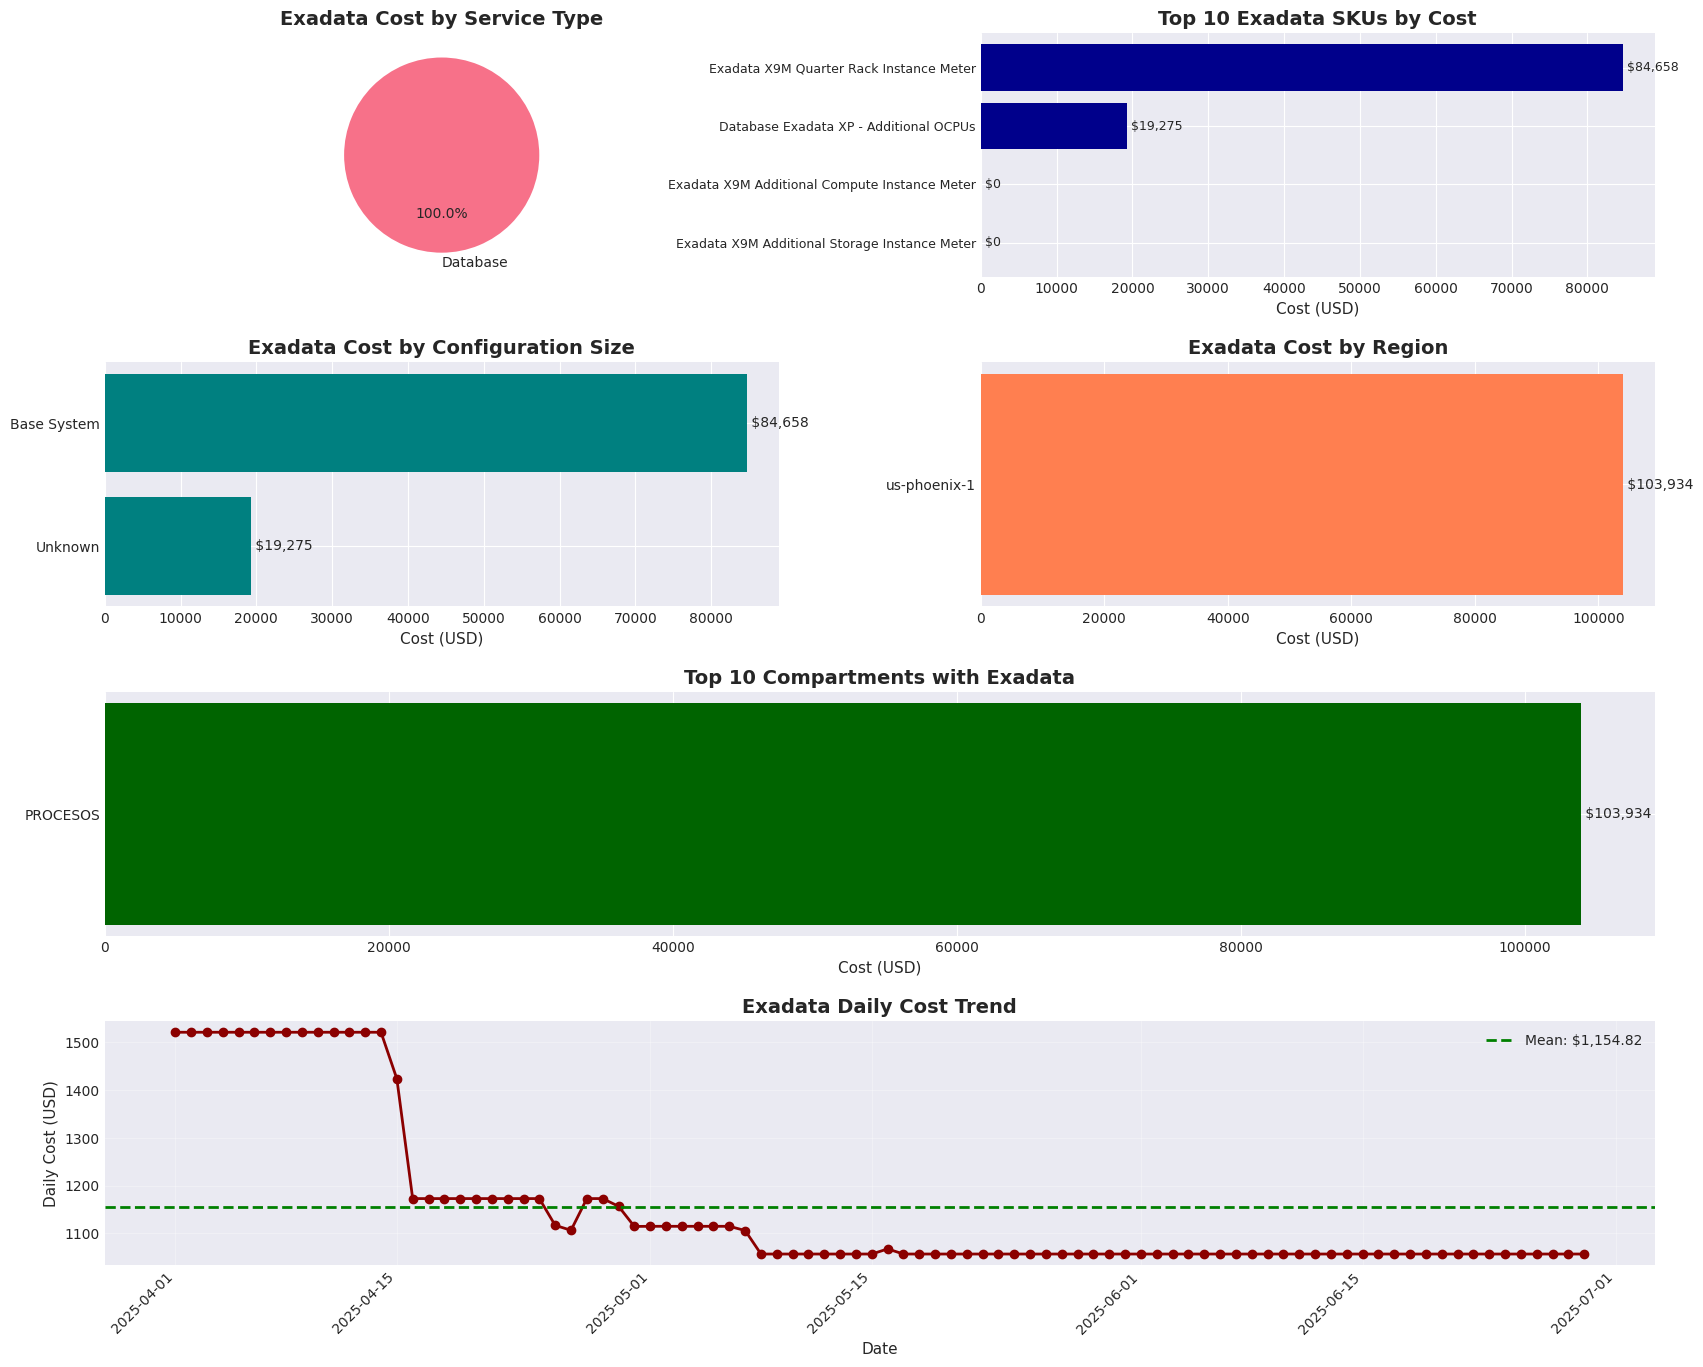

✅ Visualizations complete


📁 EXPORTING EXADATA ANALYSIS DATA:
--------------------------------------------------------------------------------------------------------------------------------------------
✅ Exported: ../output/exadata_systems_detail.csv (0 systems)
✅ Exported: ../output/exadata_sku_analysis.csv (4 SKUs)
✅ Exported: ../output/exadata_compartments.csv (1 compartments)
✅ Exported: ../output/exadata_daily_costs.csv (90 days)

✅ EXADATA ANALYSIS COMPLETE


In [6]:
# Comprehensive Exadata Cost Analysis
# Filter all Exadata-related services and SKUs
exadata_keywords = ['Exadata', 'ExaCS', 'ExaCC', 'Exadata Cloud Service', 'Exadata Cloud at Customer']

# Build filter conditions safely
filter_conditions = df['service'].str.contains('Exadata', case=False, na=False)

# Add skuName filter if column exists
if 'skuName' in df.columns:
    filter_conditions = filter_conditions | df['skuName'].fillna('').astype(str).str.contains('Exadata', case=False, na=False)

# Add skuPartNumber filter if column exists
if 'skuPartNumber' in df.columns:
    filter_conditions = filter_conditions | df['skuPartNumber'].fillna('').astype(str).str.contains('Exadata', case=False, na=False)

# Add resourceName filter for additional coverage
if 'resourceName' in df.columns:
    filter_conditions = filter_conditions | df['resourceName'].fillna('').astype(str).str.contains('Exadata', case=False, na=False)

exadata_df = df[filter_conditions].copy()

if len(exadata_df) > 0:
    print("\n" + "="*140)
    print(" "*50 + "🏢 EXADATA INFRASTRUCTURE ANALYSIS")
    print("="*140)
    
    # SECTION 1: EXECUTIVE SUMMARY
    total_exadata_cost = exadata_df['computedAmount'].sum()
    total_exadata_hours = exadata_df['computedQuantity'].sum()
    unique_systems = exadata_df['resourceId'].nunique()
    avg_hourly_rate = total_exadata_cost / total_exadata_hours if total_exadata_hours > 0 else 0
    
    print("\n📊 EXECUTIVE SUMMARY:")
    print("-" * 140)
    print(f"{'Total Exadata Spend:':<40} ${total_exadata_cost:>18,.2f}")
    print(f"{'Percentage of Total Cloud Spend:':<40} {(total_exadata_cost/df['computedAmount'].sum())*100:>17.2f}%")
    print(f"{'Total Compute Hours:':<40} {total_exadata_hours:>18,.2f}")
    print(f"{'Average Hourly Rate:':<40} ${avg_hourly_rate:>18,.2f}")
    print(f"{'Unique Exadata Systems/Resources:':<40} {unique_systems:>18,}")
    print(f"{'Unique Compartments:':<40} {exadata_df['compartment_name_clean'].nunique():>18,}")
    print(f"{'Regions with Exadata:':<40} {exadata_df['region_from_call2'].nunique():>18,}")
    print(f"{'Date Range:':<40} {str(exadata_df['timeUsageStarted'].min())[:10]} to {str(exadata_df['timeUsageEnded'].max())[:10]:>6}")
    
    # SECTION 2: SERVICE TYPE BREAKDOWN
    print("\n\n💼 EXADATA SERVICE TYPE BREAKDOWN:")
    print("-" * 140)
    service_breakdown = exadata_df.groupby('service').agg({
        'computedAmount': 'sum',
        'computedQuantity': 'sum',
        'resourceId': 'nunique'
    }).sort_values('computedAmount', ascending=False)
    
    print(f"{'Service Type':<50} {'Total Cost':>15} {'% of Total':>10} {'Hours':>15} {'Systems':>8}")
    print("-" * 140)
    for service, row in service_breakdown.iterrows():
        pct = (row['computedAmount'] / total_exadata_cost) * 100
        print(f"{service:<50} ${row['computedAmount']:>14,.2f} {pct:>9.1f}% {row['computedQuantity']:>15,.1f} {row['resourceId']:>8}")
    
    # SECTION 3: SKU/SHAPE ANALYSIS
    print("\n\n🔧 DETAILED SKU/SHAPE ANALYSIS:")
    print("-" * 140)
    
    exadata_df['sku_clean'] = exadata_df['skuName'].fillna(exadata_df['skuPartNumber']).fillna('Unknown SKU')
    
    sku_analysis = exadata_df.groupby('sku_clean').agg({
        'computedAmount': 'sum',
        'computedQuantity': 'sum',
        'resourceId': 'nunique',
        'service': 'first'
    }).sort_values('computedAmount', ascending=False)
    
    sku_analysis['cost_per_hour'] = sku_analysis['computedAmount'] / sku_analysis['computedQuantity'].replace(0, 1)
    sku_analysis['cost_per_system'] = sku_analysis['computedAmount'] / sku_analysis['resourceId']
    
    print(f"{'SKU/Configuration':<60} {'Total Cost':>15} {'% Total':>8} {'Systems':>8} {'$/Hour':>12} {'$/System':>15}")
    print("-" * 140)
    for sku, row in sku_analysis.head(20).iterrows():
        pct = (row['computedAmount'] / total_exadata_cost) * 100
        sku_display = str(sku)[:58]
        print(f"{sku_display:<60} ${row['computedAmount']:>14,.2f} {pct:>7.1f}% {row['resourceId']:>8} ${row['cost_per_hour']:>11,.2f} ${row['cost_per_system']:>14,.2f}")
    
    # SECTION 4: SHAPE/SIZE ANALYSIS
    print("\n\n📏 EXADATA SHAPE/SIZE ANALYSIS:")
    print("-" * 140)
    
    exadata_df['shape_category'] = 'Unknown'
    exadata_df.loc[exadata_df['sku_clean'].str.contains('Quarter Rack|1/4 Rack', case=False, na=False), 'shape_category'] = 'Quarter Rack (1/4)'
    exadata_df.loc[exadata_df['sku_clean'].str.contains('Half Rack|1/2 Rack', case=False, na=False), 'shape_category'] = 'Half Rack (1/2)'
    exadata_df.loc[exadata_df['sku_clean'].str.contains('Full Rack', case=False, na=False), 'shape_category'] = 'Full Rack'
    exadata_df.loc[exadata_df['sku_clean'].str.contains('Base System|X8M|X9M|X10M', case=False, na=False), 'shape_category'] = 'Base System'
    exadata_df.loc[exadata_df['sku_clean'].str.contains('Elastic', case=False, na=False), 'shape_category'] = 'Elastic Configuration'
    
    shape_analysis = exadata_df.groupby('shape_category').agg({
        'computedAmount': 'sum',
        'resourceId': 'nunique',
        'computedQuantity': 'sum'
    }).sort_values('computedAmount', ascending=False)
    
    print(f"{'Configuration Size':<40} {'Total Cost':>15} {'% of Total':>12} {'Systems':>10} {'Total Hours':>15}")
    print("-" * 140)
    for shape, row in shape_analysis.iterrows():
        pct = (row['computedAmount'] / total_exadata_cost) * 100
        print(f"{shape:<40} ${row['computedAmount']:>14,.2f} {pct:>11.1f}% {row['resourceId']:>10} {row['computedQuantity']:>15,.1f}")
    
    # SECTION 5: REGIONAL DISTRIBUTION
    print("\n\n🌍 REGIONAL DISTRIBUTION:")
    print("-" * 140)
    
    region_analysis = exadata_df.groupby('region_from_call2').agg({
        'computedAmount': 'sum',
        'resourceId': 'nunique',
        'compartment_name_clean': 'nunique'
    }).sort_values('computedAmount', ascending=False)
    
    print(f"{'Region':<35} {'Total Cost':>15} {'% of Total':>12} {'Systems':>10} {'Compartments':>15}")
    print("-" * 140)
    for region, row in region_analysis.iterrows():
        pct = (row['computedAmount'] / total_exadata_cost) * 100
        print(f"{region:<35} ${row['computedAmount']:>14,.2f} {pct:>11.1f}% {row['resourceId']:>10} {row['compartment_name_clean']:>15}")
    
    # SECTION 6: COMPARTMENT ANALYSIS
    print("\n\n📦 COMPARTMENT ANALYSIS (Top 15):")
    print("-" * 140)
    
    compartment_analysis = exadata_df.groupby(['compartment_name_clean', 'compartmentPath']).agg({
        'computedAmount': 'sum',
        'resourceId': 'nunique',
        'computedQuantity': 'sum'
    }).sort_values('computedAmount', ascending=False).head(15)
    
    print(f"{'Rank':<6} {'Compartment':<40} {'Total Cost':>15} {'% Total':>10} {'Systems':>8}")
    print(f"{'':6} {'Full Path':<110}")
    print("-" * 140)
    for idx, ((comp_name, comp_path), row) in enumerate(compartment_analysis.iterrows(), 1):
        pct = (row['computedAmount'] / total_exadata_cost) * 100
        print(f"{idx:<6} {comp_name[:38]:<40} ${row['computedAmount']:>14,.2f} {pct:>9.1f}% {row['resourceId']:>8}")
        print(f"{'':6} {comp_path[:108]}")
        print()
    
    # SECTION 7: INDIVIDUAL SYSTEMS
    print("\n\n🖥️  TOP 20 INDIVIDUAL EXADATA SYSTEMS BY COST:")
    print("-" * 140)
    
    system_details = exadata_df.groupby(['resourceId', 'resourceName', 'service', 'region_from_call2', 
                                          'compartment_name_clean', 'sku_clean']).agg({
        'computedAmount': 'sum',
        'computedQuantity': 'sum'
    }).reset_index().sort_values('computedAmount', ascending=False).head(20)
    
    system_details['hourly_rate'] = system_details['computedAmount'] / system_details['computedQuantity'].replace(0, 1)
    
    print(f"{'Rank':<6} {'Resource Name':<35} {'Service':<30} {'Total Cost':>15}")
    print(f"{'':6} {'Region':<25} {'Compartment':<40} {'$/Hour':>12}")
    print(f"{'':6} {'SKU/Configuration':<100}")
    print("-" * 140)
    for idx, row in system_details.iterrows():
        rank = system_details.index.get_loc(idx) + 1
        resource_name = str(row['resourceName'])[:33] if pd.notna(row['resourceName']) else 'N/A'
        service = str(row['service'])[:28]
        print(f"{rank:<6} {resource_name:<35} {service:<30} ${row['computedAmount']:>14,.2f}")
        print(f"{'':6} {str(row['region_from_call2'])[:23]:<25} {str(row['compartment_name_clean'])[:38]:<40} ${row['hourly_rate']:>11,.2f}")
        print(f"{'':6} {str(row['sku_clean'])[:98]}")
        print()
    
    # SECTION 8: LICENSING
    print("\n\n📜 LICENSING & COMPONENT COST BREAKDOWN:")
    print("-" * 140)
    
    exadata_df['cost_category'] = 'Infrastructure'
    exadata_df.loc[exadata_df['sku_clean'].str.contains('OCPU|Processor|CPU', case=False, na=False), 'cost_category'] = 'Compute/OCPU'
    exadata_df.loc[exadata_df['sku_clean'].str.contains('Storage|TB|Terabyte', case=False, na=False), 'cost_category'] = 'Storage'
    exadata_df.loc[exadata_df['sku_clean'].str.contains('Database|Enterprise Edition|Standard Edition', case=False, na=False), 'cost_category'] = 'Database License'
    exadata_df.loc[exadata_df['sku_clean'].str.contains('Backup|RMAN', case=False, na=False), 'cost_category'] = 'Backup'
    exadata_df.loc[exadata_df['sku_clean'].str.contains('Support|Premier', case=False, na=False), 'cost_category'] = 'Support'
    
    category_breakdown = exadata_df.groupby('cost_category').agg({
        'computedAmount': 'sum',
        'computedQuantity': 'sum'
    }).sort_values('computedAmount', ascending=False)
    
    print(f"{'Cost Category':<40} {'Total Cost':>15} {'% of Total':>12} {'Total Units':>15}")
    print("-" * 140)
    for category, row in category_breakdown.iterrows():
        pct = (row['computedAmount'] / total_exadata_cost) * 100
        print(f"{category:<40} ${row['computedAmount']:>14,.2f} {pct:>11.1f}% {row['computedQuantity']:>15,.2f}")
    
    # SECTION 9: TIME-BASED
    print("\n\n📅 DAILY COST TREND ANALYSIS:")
    print("-" * 140)
    
    daily_exadata = exadata_df.groupby(exadata_df['timeUsageStarted'].dt.date).agg({
        'computedAmount': 'sum'
    }).reset_index()
    daily_exadata.columns = ['date', 'daily_cost']
    
    print(f"{'Average Daily Cost:':<40} ${daily_exadata['daily_cost'].mean():>18,.2f}")
    print(f"{'Median Daily Cost:':<40} ${daily_exadata['daily_cost'].median():>18,.2f}")
    print(f"{'Minimum Daily Cost:':<40} ${daily_exadata['daily_cost'].min():>18,.2f}")
    print(f"{'Maximum Daily Cost:':<40} ${daily_exadata['daily_cost'].max():>18,.2f}")
    print(f"{'Standard Deviation:':<40} ${daily_exadata['daily_cost'].std():>18,.2f}")
    print(f"{'Projected Monthly Cost:':<40} ${daily_exadata['daily_cost'].mean() * 30:>18,.2f}")
    print(f"{'Projected Annual Cost:':<40} ${daily_exadata['daily_cost'].mean() * 365:>18,.2f}")
    
    # SECTION 10: EFFICIENCY
    print("\n\n⚡ COST EFFICIENCY METRICS:")
    print("-" * 140)
    
    efficiency_by_sku = exadata_df.groupby('sku_clean').agg({
        'computedAmount': 'sum',
        'computedQuantity': 'sum',
        'resourceId': 'nunique'
    })
    efficiency_by_sku['cost_per_hour'] = efficiency_by_sku['computedAmount'] / efficiency_by_sku['computedQuantity'].replace(0, 1)
    efficiency_by_sku['cost_per_system_per_day'] = (efficiency_by_sku['computedAmount'] / efficiency_by_sku['resourceId']) / (efficiency_by_sku['computedQuantity'] / efficiency_by_sku['resourceId'] / 24).replace(0, 1)
    efficiency_by_sku = efficiency_by_sku.sort_values('cost_per_hour', ascending=False).head(10)
    
    print(f"{'SKU (Top 10 Most Expensive)':<65} {'$/Hour':>12} {'$/System/Day':>15} {'Systems':>8}")
    print("-" * 140)
    for sku, row in efficiency_by_sku.iterrows():
        sku_display = str(sku)[:63]
        print(f"{sku_display:<65} ${row['cost_per_hour']:>11,.2f} ${row['cost_per_system_per_day']:>14,.2f} {row['resourceId']:>8}")
    
    # SECTION 11: OPTIMIZATION
    print("\n\n💡 EXADATA COST OPTIMIZATION OPPORTUNITIES:")
    print("-" * 140)
    
    system_utilization = exadata_df.groupby('resourceId').agg({
        'computedAmount': 'sum',
        'computedQuantity': 'sum'
    })
    system_utilization['utilization_ratio'] = system_utilization['computedQuantity'] / system_utilization['computedQuantity'].max()
    underutilized = system_utilization[system_utilization['utilization_ratio'] < 0.5].sort_values('computedAmount', ascending=False)
    
    if len(underutilized) > 0:
        print(f"\n1️⃣  POTENTIALLY UNDERUTILIZED SYSTEMS: {len(underutilized)}")
        print(f"    Total Cost: ${underutilized['computedAmount'].sum():,.2f}")
    
    if exadata_df['region_from_call2'].nunique() > 1:
        print(f"\n2️⃣  MULTI-REGION DEPLOYMENT:")
        print(f"    Exadata deployed across {exadata_df['region_from_call2'].nunique()} regions")
    
    if 'Full Rack' in exadata_df['shape_category'].values or 'Half Rack' in exadata_df['shape_category'].values:
        large_config_cost = exadata_df[exadata_df['shape_category'].isin(['Full Rack', 'Half Rack'])]['computedAmount'].sum()
        print(f"\n3️⃣  LARGE CONFIGURATION ANALYSIS:")
        print(f"    Full/Half Rack systems cost: ${large_config_cost:,.2f}")
    
    top_3_systems_cost = system_details.head(3)['computedAmount'].sum()
    top_3_pct = (top_3_systems_cost / total_exadata_cost) * 100
    print(f"\n4️⃣  COST CONCENTRATION:")
    print(f"    Top 3 systems: {top_3_pct:.1f}% of total (${top_3_systems_cost:,.2f})")
    
    print(f"\n5️⃣  RECOMMENDATIONS:")
    print(f"    • Review Cloud Advisor for Exadata-specific recommendations")
    print(f"    • Consider Autonomous Database migration")
    print(f"    • Evaluate ExaCC vs ExaCS cost-benefit")
    
    # VISUALIZATIONS
    if total_exadata_cost > 0:
        print("\n\n📊 Generating visualizations...")
        
        fig = plt.figure(figsize=(20, 16))
        gs = fig.add_gridspec(4, 2, hspace=0.35, wspace=0.3)
        
        ax1 = fig.add_subplot(gs[0, 0])
        service_costs = service_breakdown['computedAmount']
        if len(service_costs) > 5:
            top_services = service_costs.head(5)
            other = service_costs[5:].sum()
            plot_data = pd.concat([top_services, pd.Series({'Others': other})])
        else:
            plot_data = service_costs
        ax1.pie(plot_data.values, labels=plot_data.index, autopct='%1.1f%%', startangle=90)
        ax1.set_title('Exadata Cost by Service Type', fontsize=14, fontweight='bold')
        
        ax2 = fig.add_subplot(gs[0, 1])
        top_skus = sku_analysis['computedAmount'].head(10)
        sku_labels = [str(x)[:45] + '...' if len(str(x)) > 45 else str(x) for x in top_skus.index]
        ax2.barh(range(len(top_skus)), top_skus.values, color='darkblue')
        ax2.set_yticks(range(len(top_skus)))
        ax2.set_yticklabels(sku_labels, fontsize=9)
        ax2.set_xlabel('Cost (USD)', fontsize=11)
        ax2.set_title('Top 10 Exadata SKUs by Cost', fontsize=14, fontweight='bold')
        ax2.invert_yaxis()
        for i, v in enumerate(top_skus.values):
            ax2.text(v, i, f' ${v:,.0f}', va='center', fontsize=9)
        
        ax3 = fig.add_subplot(gs[1, 0])
        shape_costs = shape_analysis['computedAmount']
        ax3.barh(range(len(shape_costs)), shape_costs.values, color='teal')
        ax3.set_yticks(range(len(shape_costs)))
        ax3.set_yticklabels(shape_costs.index, fontsize=10)
        ax3.set_xlabel('Cost (USD)', fontsize=11)
        ax3.set_title('Exadata Cost by Configuration Size', fontsize=14, fontweight='bold')
        ax3.invert_yaxis()
        for i, v in enumerate(shape_costs.values):
            ax3.text(v, i, f' ${v:,.0f}', va='center', fontsize=10)
        
        ax4 = fig.add_subplot(gs[1, 1])
        region_costs = region_analysis['computedAmount']
        ax4.barh(range(len(region_costs)), region_costs.values, color='coral')
        ax4.set_yticks(range(len(region_costs)))
        ax4.set_yticklabels(region_costs.index, fontsize=10)
        ax4.set_xlabel('Cost (USD)', fontsize=11)
        ax4.set_title('Exadata Cost by Region', fontsize=14, fontweight='bold')
        ax4.invert_yaxis()
        for i, v in enumerate(region_costs.values):
            ax4.text(v, i, f' ${v:,.0f}', va='center', fontsize=10)
        
        ax5 = fig.add_subplot(gs[2, :])
        comp_costs = compartment_analysis['computedAmount'].head(10)
        comp_labels = [str(x[0])[:50] for x in comp_costs.index]
        ax5.barh(range(len(comp_costs)), comp_costs.values, color='darkgreen')
        ax5.set_yticks(range(len(comp_costs)))
        ax5.set_yticklabels(comp_labels, fontsize=10)
        ax5.set_xlabel('Cost (USD)', fontsize=11)
        ax5.set_title('Top 10 Compartments with Exadata', fontsize=14, fontweight='bold')
        ax5.invert_yaxis()
        for i, v in enumerate(comp_costs.values):
            ax5.text(v, i, f' ${v:,.0f}', va='center', fontsize=10)
        
        ax6 = fig.add_subplot(gs[3, :])
        daily_exadata['date'] = pd.to_datetime(daily_exadata['date'])
        ax6.plot(daily_exadata['date'], daily_exadata['daily_cost'], marker='o', linewidth=2, markersize=6, color='darkred')
        ax6.axhline(y=daily_exadata['daily_cost'].mean(), color='green', linestyle='--', linewidth=2, label=f"Mean: ${daily_exadata['daily_cost'].mean():,.2f}")
        ax6.set_xlabel('Date', fontsize=11)
        ax6.set_ylabel('Daily Cost (USD)', fontsize=11)
        ax6.set_title('Exadata Daily Cost Trend', fontsize=14, fontweight='bold')
        ax6.legend(fontsize=10)
        ax6.grid(True, alpha=0.3)
        plt.setp(ax6.xaxis.get_majorticklabels(), rotation=45, ha='right')
        
        plt.tight_layout()
        plt.show()
        
        print("✅ Visualizations complete")
    
    # EXPORTS
    print("\n\n📁 EXPORTING EXADATA ANALYSIS DATA:")
    print("-" * 140)
    
    system_export = system_details[['resourceId', 'resourceName', 'service', 'region_from_call2', 
                                      'compartment_name_clean', 'sku_clean', 'computedAmount', 
                                      'computedQuantity', 'hourly_rate']].copy()
    system_export.columns = ['Resource_ID', 'Resource_Name', 'Service', 'Region', 'Compartment', 
                              'SKU', 'Total_Cost', 'Total_Hours', 'Hourly_Rate']
    system_export.to_csv('../output/exadata_systems_detail.csv', index=False)
    print(f"✅ Exported: ../output/exadata_systems_detail.csv ({len(system_export)} systems)")
    
    sku_export = sku_analysis.reset_index()
    sku_export.columns = ['SKU', 'Total_Cost', 'Total_Hours', 'Num_Systems', 'Service', 'Cost_Per_Hour', 'Cost_Per_System']
    sku_export.to_csv('../output/exadata_sku_analysis.csv', index=False)
    print(f"✅ Exported: ../output/exadata_sku_analysis.csv ({len(sku_export)} SKUs)")
    
    comp_export = compartment_analysis.reset_index()
    comp_export.columns = ['Compartment', 'Compartment_Path', 'Total_Cost', 'Num_Systems', 'Total_Hours']
    comp_export.to_csv('../output/exadata_compartments.csv', index=False)
    print(f"✅ Exported: ../output/exadata_compartments.csv ({len(comp_export)} compartments)")
    
    daily_exadata.columns = ['Date', 'Daily_Cost']
    daily_exadata.to_csv('../output/exadata_daily_costs.csv', index=False)
    print(f"✅ Exported: ../output/exadata_daily_costs.csv ({len(daily_exadata)} days)")
    
    print("\n" + "="*140)
    print("✅ EXADATA ANALYSIS COMPLETE")
    print("="*140)
    
else:
    print("\n⚠️ No Exadata infrastructure found in the dataset")

## 3. Executive Summary - Key Metrics

In [7]:
# Calculate key metrics
total_cost = df['computedAmount'].sum()
daily_avg_cost = df.groupby('date')['computedAmount'].sum().mean()
top_service = df.groupby('service')['computedAmount'].sum().idxmax()
top_service_cost = df.groupby('service')['computedAmount'].sum().max()
top_region = df.groupby('region_from_call2')['computedAmount'].sum().idxmax()
top_compartment = df.groupby('compartment_name_clean')['computedAmount'].sum().idxmax()

# Display executive summary
print("="*80)
print(" "*25 + "EXECUTIVE SUMMARY")
print("="*80)
print(f"\n💰 Total Cost:                  ${total_cost:,.2f}")
print(f"📅 Daily Average Cost:          ${daily_avg_cost:,.2f}")
print(f"📊 Monthly Projected Cost:      ${daily_avg_cost * 30:,.2f}")
print(f"\n🏆 Top Service:                 {top_service}")
print(f"   Cost: ${top_service_cost:,.2f} ({top_service_cost/total_cost*100:.1f}%)")
print(f"\n🌍 Top Region:                  {top_region}")
print(f"📦 Top Compartment:             {top_compartment}")
print(f"\n🔢 Total Resources:             {df['resourceId'].nunique():,}")
print(f"🔢 Active Compartments:         {df['compartment_name_clean'].nunique():,}")
print("="*80)

                         EXECUTIVE SUMMARY

💰 Total Cost:                  $107,212.29
📅 Daily Average Cost:          $1,191.25
📊 Monthly Projected Cost:      $35,737.43

🏆 Top Service:                 Database
   Cost: $103,933.94 (96.9%)

🌍 Top Region:                  us-phoenix-1
📦 Top Compartment:             PROCESOS

🔢 Total Resources:             48
🔢 Active Compartments:         2


## 4. Cost Analysis by Service


📊 Top 10 Services by Cost:
 1. Database                                 $  103,933.94 ( 96.9%)
 2. File Storage                             $    2,776.57 (  2.6%)
 3. Compute                                  $      367.73 (  0.3%)
 4. Object Storage                           $      134.05 (  0.1%)
 5. Block Storage                            $        0.00 (  0.0%)
 6. Logging                                  $        0.00 (  0.0%)
 7. Telemetry                                $        0.00 (  0.0%)
 8. Virtual Cloud Network                    $        0.00 (  0.0%)


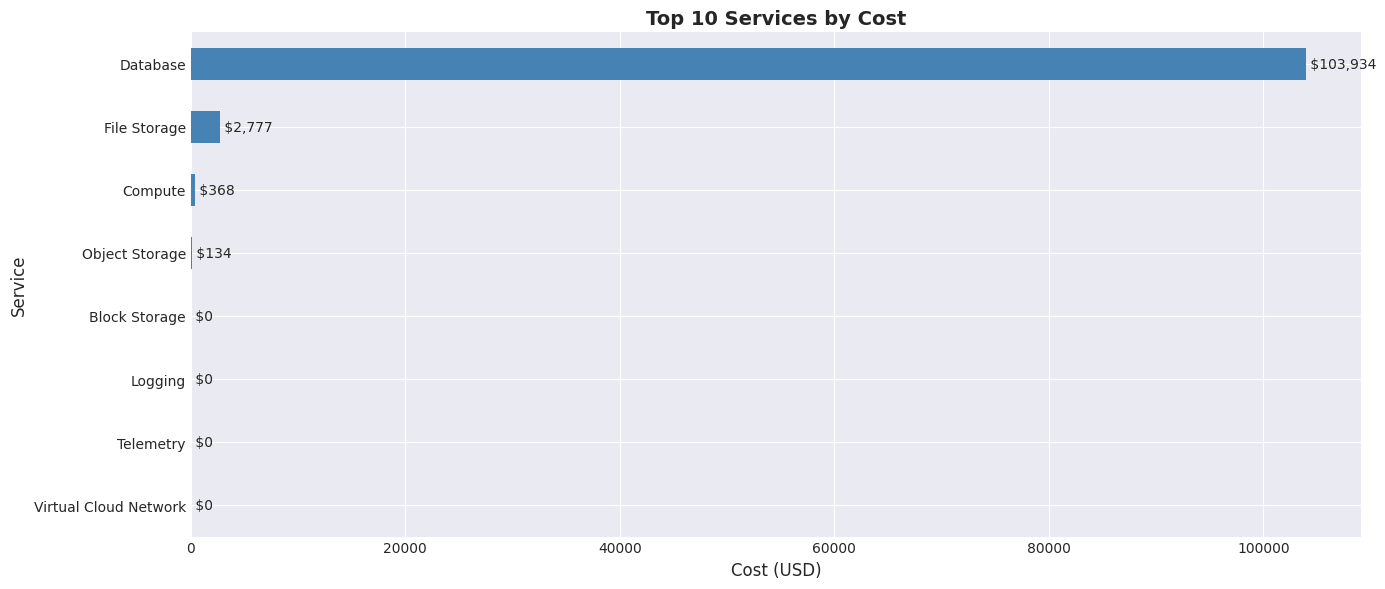

In [8]:
# Top 10 services by cost
service_costs = df.groupby('service')['computedAmount'].sum().sort_values(ascending=False).head(10)

print("\n📊 Top 10 Services by Cost:")
print("="*80)
for idx, (service, cost) in enumerate(service_costs.items(), 1):
    pct = (cost/total_cost)*100
    print(f"{idx:2d}. {service:40s} ${cost:>12,.2f} ({pct:>5.1f}%)")

# Visualization
plt.figure(figsize=(14, 6))
service_costs.plot(kind='barh', color='steelblue')
plt.xlabel('Cost (USD)', fontsize=12)
plt.ylabel('Service', fontsize=12)
plt.title('Top 10 Services by Cost', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
for i, v in enumerate(service_costs.values):
    plt.text(v, i, f' ${v:,.0f}', va='center', fontsize=10)
plt.tight_layout()
plt.show()

## 5. Cost Analysis by Region


🌍 Cost Distribution by Region:
 1. us-phoenix-1                   $  107,212.29 (100.0%)


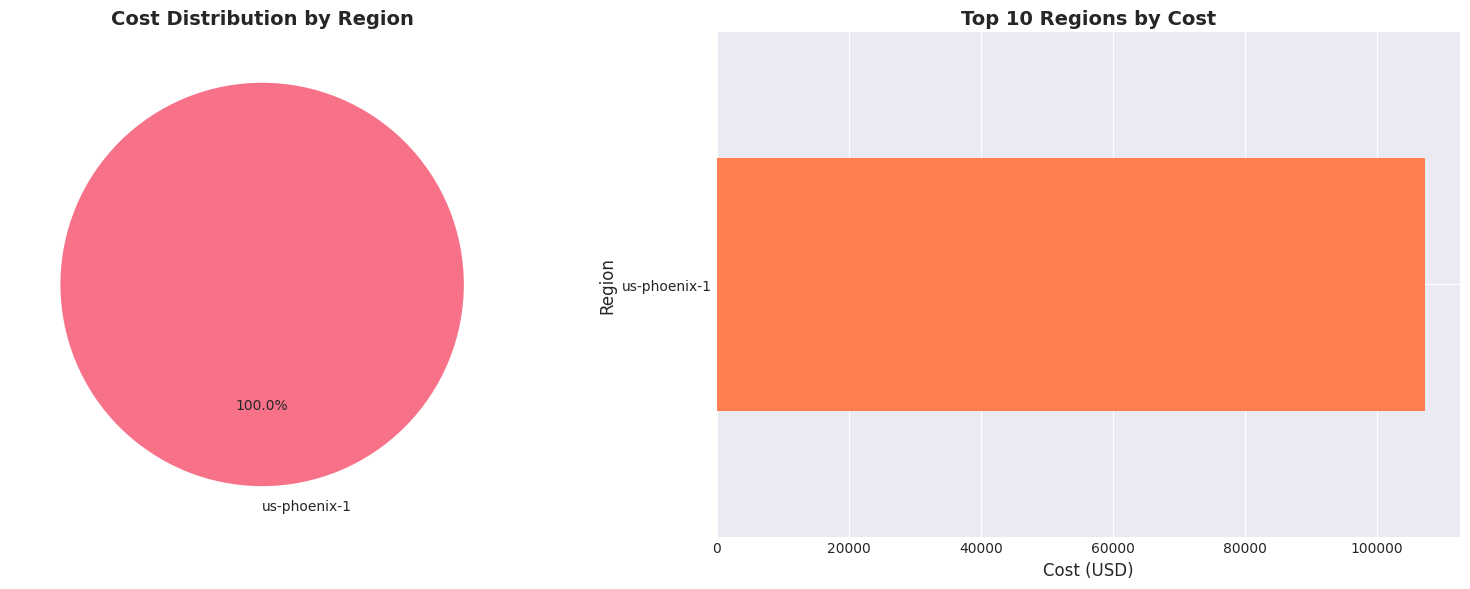

In [9]:
# Regional cost analysis
region_costs = df.groupby('region_from_call2')['computedAmount'].sum().sort_values(ascending=False)

print("\n🌍 Cost Distribution by Region:")
print("="*80)
for idx, (region, cost) in enumerate(region_costs.items(), 1):
    pct = (cost/total_cost)*100
    print(f"{idx:2d}. {region:30s} ${cost:>12,.2f} ({pct:>5.1f}%)")

# Visualization - Pie chart for top regions
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Pie chart
top_regions = region_costs.head(8)
other_cost = region_costs[8:].sum()
if other_cost > 0:
    plot_data = pd.concat([top_regions, pd.Series({'Others': other_cost})])
else:
    plot_data = top_regions

ax1.pie(plot_data.values, labels=plot_data.index, autopct='%1.1f%%', startangle=90)
ax1.set_title('Cost Distribution by Region', fontsize=14, fontweight='bold')

# Bar chart
region_costs.head(10).plot(kind='barh', ax=ax2, color='coral')
ax2.set_xlabel('Cost (USD)', fontsize=12)
ax2.set_ylabel('Region', fontsize=12)
ax2.set_title('Top 10 Regions by Cost', fontsize=14, fontweight='bold')
ax2.invert_yaxis()

plt.tight_layout()
plt.show()

## 6. Cost Analysis by Compartment


📦 Top 15 Compartments by Cost:
 1. PROCESOS                                 $  107,212.29 (100.0%)
 2. acfin                                    $        0.00 (  0.0%)


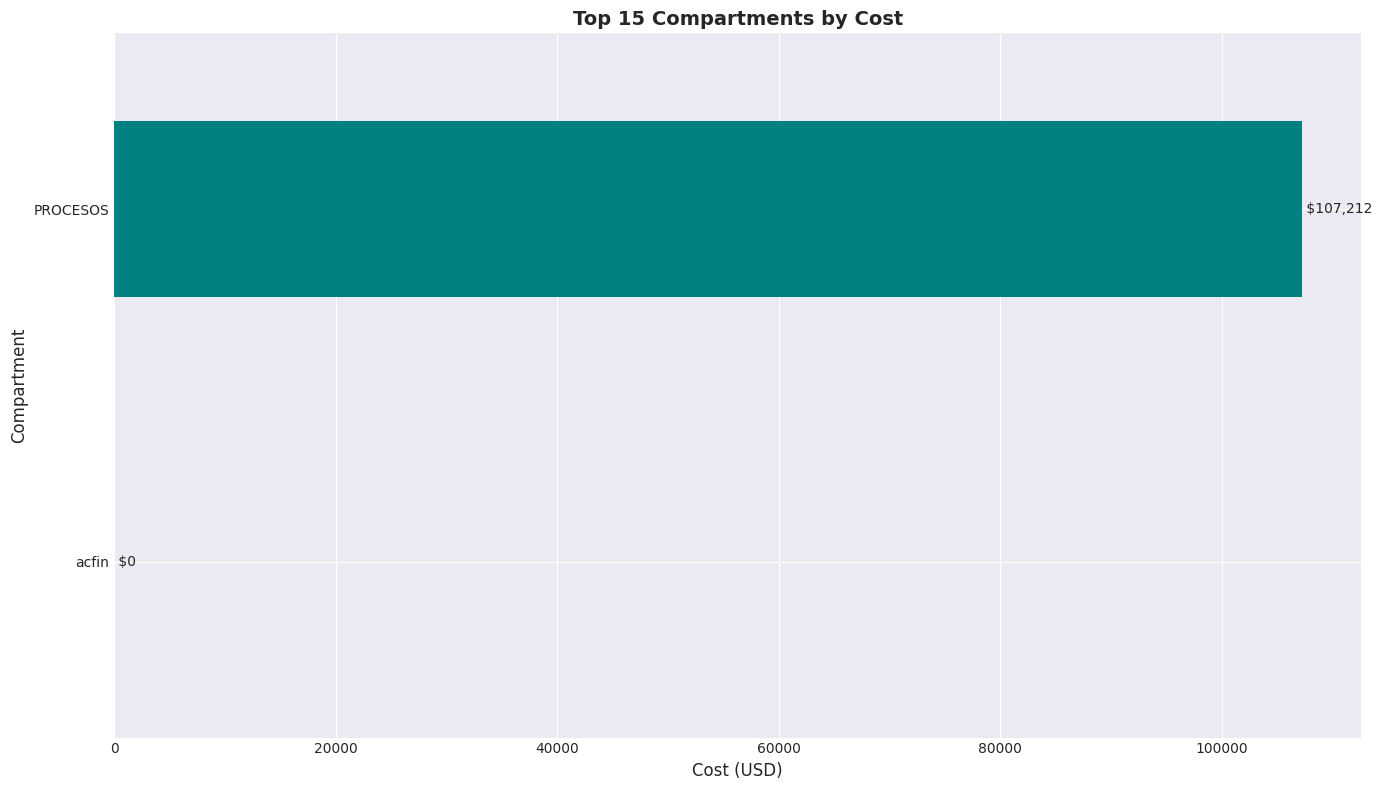

In [10]:
# Top 15 compartments by cost
compartment_costs = df.groupby('compartment_name_clean')['computedAmount'].sum().sort_values(ascending=False).head(15)

print("\n📦 Top 15 Compartments by Cost:")
print("="*80)
for idx, (comp, cost) in enumerate(compartment_costs.items(), 1):
    pct = (cost/total_cost)*100
    print(f"{idx:2d}. {comp:40s} ${cost:>12,.2f} ({pct:>5.1f}%)")

# Visualization
plt.figure(figsize=(14, 8))
compartment_costs.plot(kind='barh', color='teal')
plt.xlabel('Cost (USD)', fontsize=12)
plt.ylabel('Compartment', fontsize=12)
plt.title('Top 15 Compartments by Cost', fontsize=14, fontweight='bold')
plt.gca().invert_yaxis()
for i, v in enumerate(compartment_costs.values):
    plt.text(v, i, f' ${v:,.0f}', va='center', fontsize=10)
plt.tight_layout()
plt.show()

## 7. Time Series Analysis - Daily Cost Trends


📈 Daily Cost Statistics (from output.csv):
Average Daily Cost:    $1,191.25
Median Daily Cost:     $1,128.93
Min Daily Cost:        $1,070.13
Max Daily Cost:        $1,549.79
Std Deviation:         $161.19
Total Days:            90


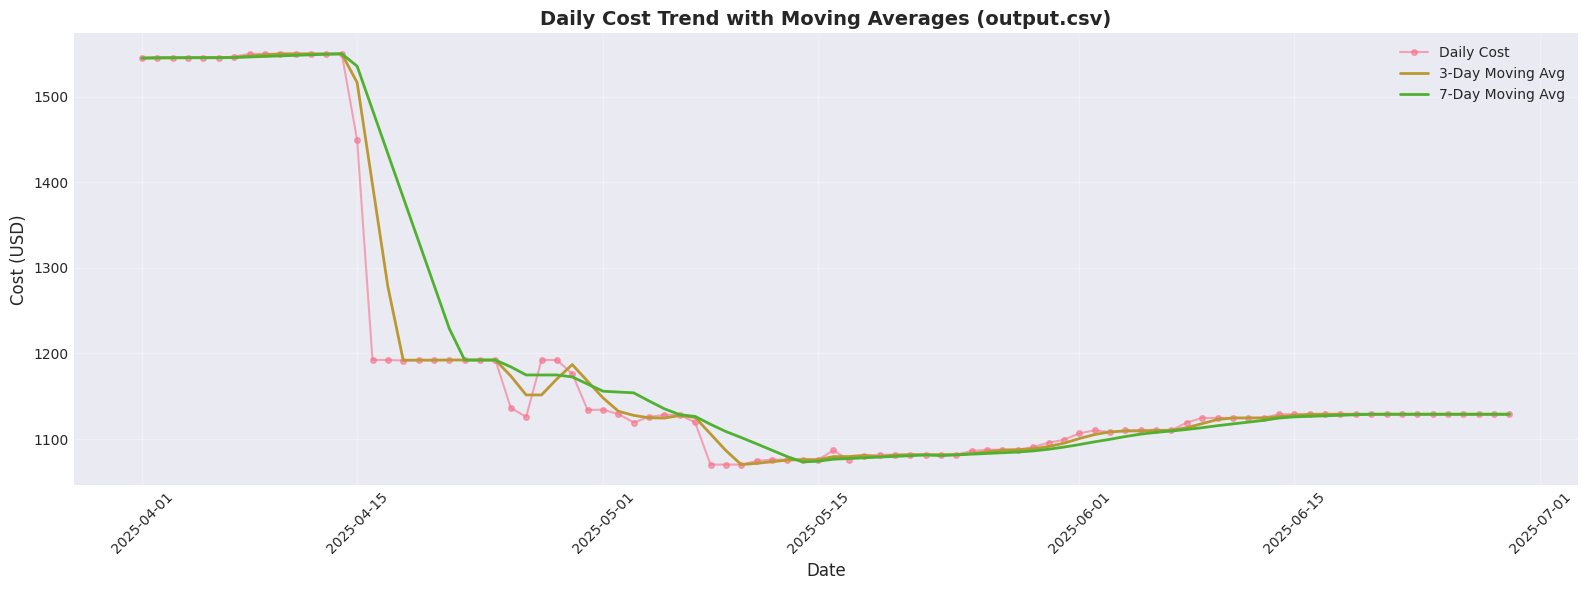

In [11]:
# Use df_trends (output.csv) for more granular time series analysis
# Daily cost aggregation from trends data
daily_costs = df_trends.groupby('date')['computedAmount'].sum().reset_index()
daily_costs['date'] = pd.to_datetime(daily_costs['date'])
daily_costs = daily_costs.sort_values('date')

# Calculate moving averages
daily_costs['MA3'] = daily_costs['computedAmount'].rolling(window=3, min_periods=1).mean()
daily_costs['MA7'] = daily_costs['computedAmount'].rolling(window=7, min_periods=1).mean()

print("\n📈 Daily Cost Statistics (from output.csv):")
print("="*80)
print(f"Average Daily Cost:    ${daily_costs['computedAmount'].mean():,.2f}")
print(f"Median Daily Cost:     ${daily_costs['computedAmount'].median():,.2f}")
print(f"Min Daily Cost:        ${daily_costs['computedAmount'].min():,.2f}")
print(f"Max Daily Cost:        ${daily_costs['computedAmount'].max():,.2f}")
print(f"Std Deviation:         ${daily_costs['computedAmount'].std():,.2f}")
print(f"Total Days:            {len(daily_costs)}")

# Visualization
plt.figure(figsize=(16, 6))
plt.plot(daily_costs['date'], daily_costs['computedAmount'], marker='o', label='Daily Cost', alpha=0.6, markersize=4)
plt.plot(daily_costs['date'], daily_costs['MA3'], label='3-Day Moving Avg', linewidth=2)
plt.plot(daily_costs['date'], daily_costs['MA7'], label='7-Day Moving Avg', linewidth=2)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Cost (USD)', fontsize=12)
plt.title('Daily Cost Trend with Moving Averages (output.csv)', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 8. Service Cost Distribution Over Time


📊 Top 5 Services for Time Series Analysis:
1. Database                       $  103,933.94
2. File Storage                   $    2,776.57
3. Compute                        $      367.73
4. Object Storage                 $      134.05
5. Block Storage                  $        0.00


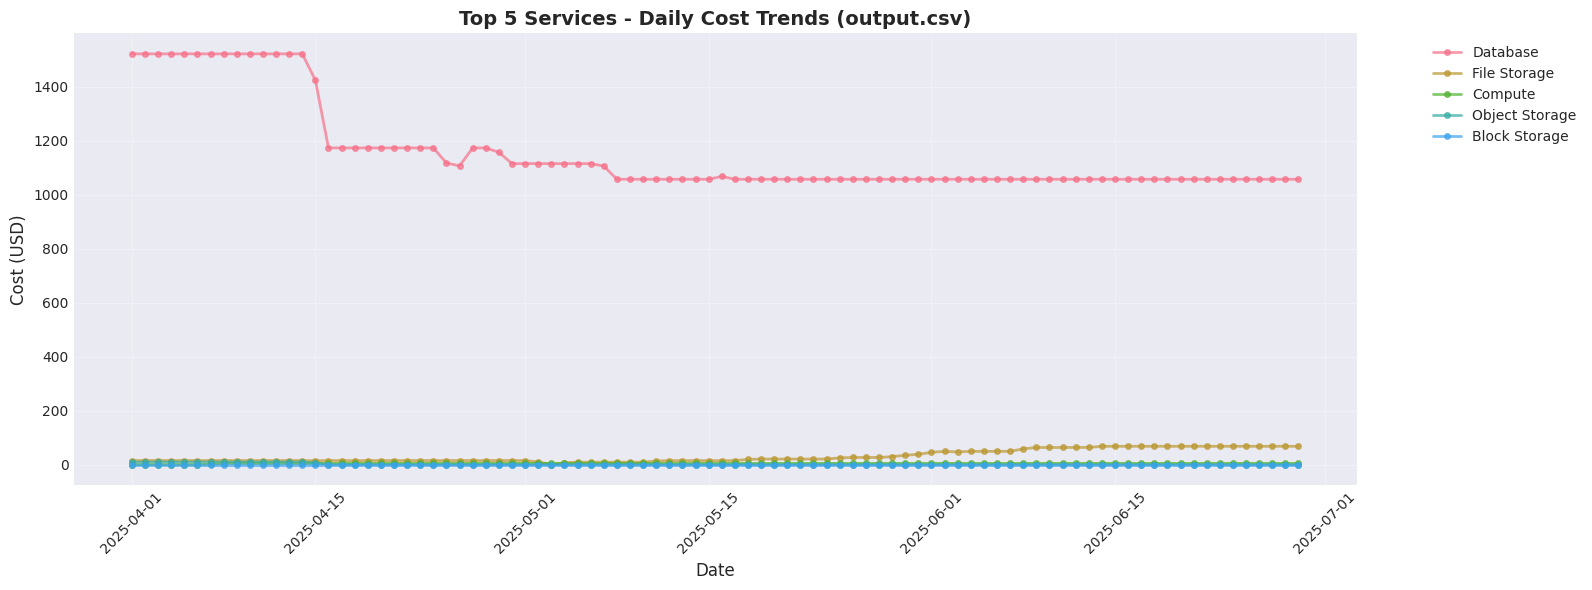

In [12]:
# Use df_trends (output.csv) for service cost trends over time
# Top 5 services cost over time
top5_services = df_trends.groupby('service')['computedAmount'].sum().nlargest(5).index
service_daily = df_trends[df_trends['service'].isin(top5_services)].groupby(['date', 'service'])['computedAmount'].sum().reset_index()
service_daily['date'] = pd.to_datetime(service_daily['date'])

print("\n📊 Top 5 Services for Time Series Analysis:")
for idx, service in enumerate(top5_services, 1):
    total_cost = df_trends[df_trends['service'] == service]['computedAmount'].sum()
    print(f"{idx}. {service:30s} ${total_cost:>12,.2f}")

plt.figure(figsize=(16, 6))
for service in top5_services:
    service_data = service_daily[service_daily['service'] == service].sort_values('date')
    plt.plot(service_data['date'], service_data['computedAmount'], 
             marker='o', label=service, linewidth=2, alpha=0.7, markersize=4)

plt.xlabel('Date', fontsize=12)
plt.ylabel('Cost (USD)', fontsize=12)
plt.title('Top 5 Services - Daily Cost Trends (output.csv)', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 9. Compute Instance Analysis


💻 Compute Instance Analysis:
Total Compute Cost:     $367.73
Unique Instances:       2
Unique SKUs/Shapes:     4

🔢 Top 10 SKUs/Shapes by Cost:
 1. Standard - E5                                      $      239.82 (  1 instances, $  239.82/instance)
 2. Standard - E5 - Memory                             $      127.91 (  1 instances, $  127.91/instance)
 3. Standard - A1 - Memory                             $        0.00 (  1 instances, $    0.00/instance)
 4. Standard - A1                                      $        0.00 (  1 instances, $    0.00/instance)

📊 Cost by Shape Family:
 1. Standard             $      367.73 (100.0%) - 2 instances

🌍 Top SKUs/Shapes by Region:
   us-phoenix-1         | Standard - E5                                      | $    239.82
   us-phoenix-1         | Standard - E5 - Memory                             | $    127.91
   us-phoenix-1         | Standard - A1 - Memory                             | $      0.00
   us-phoenix-1         | Standard - A1      

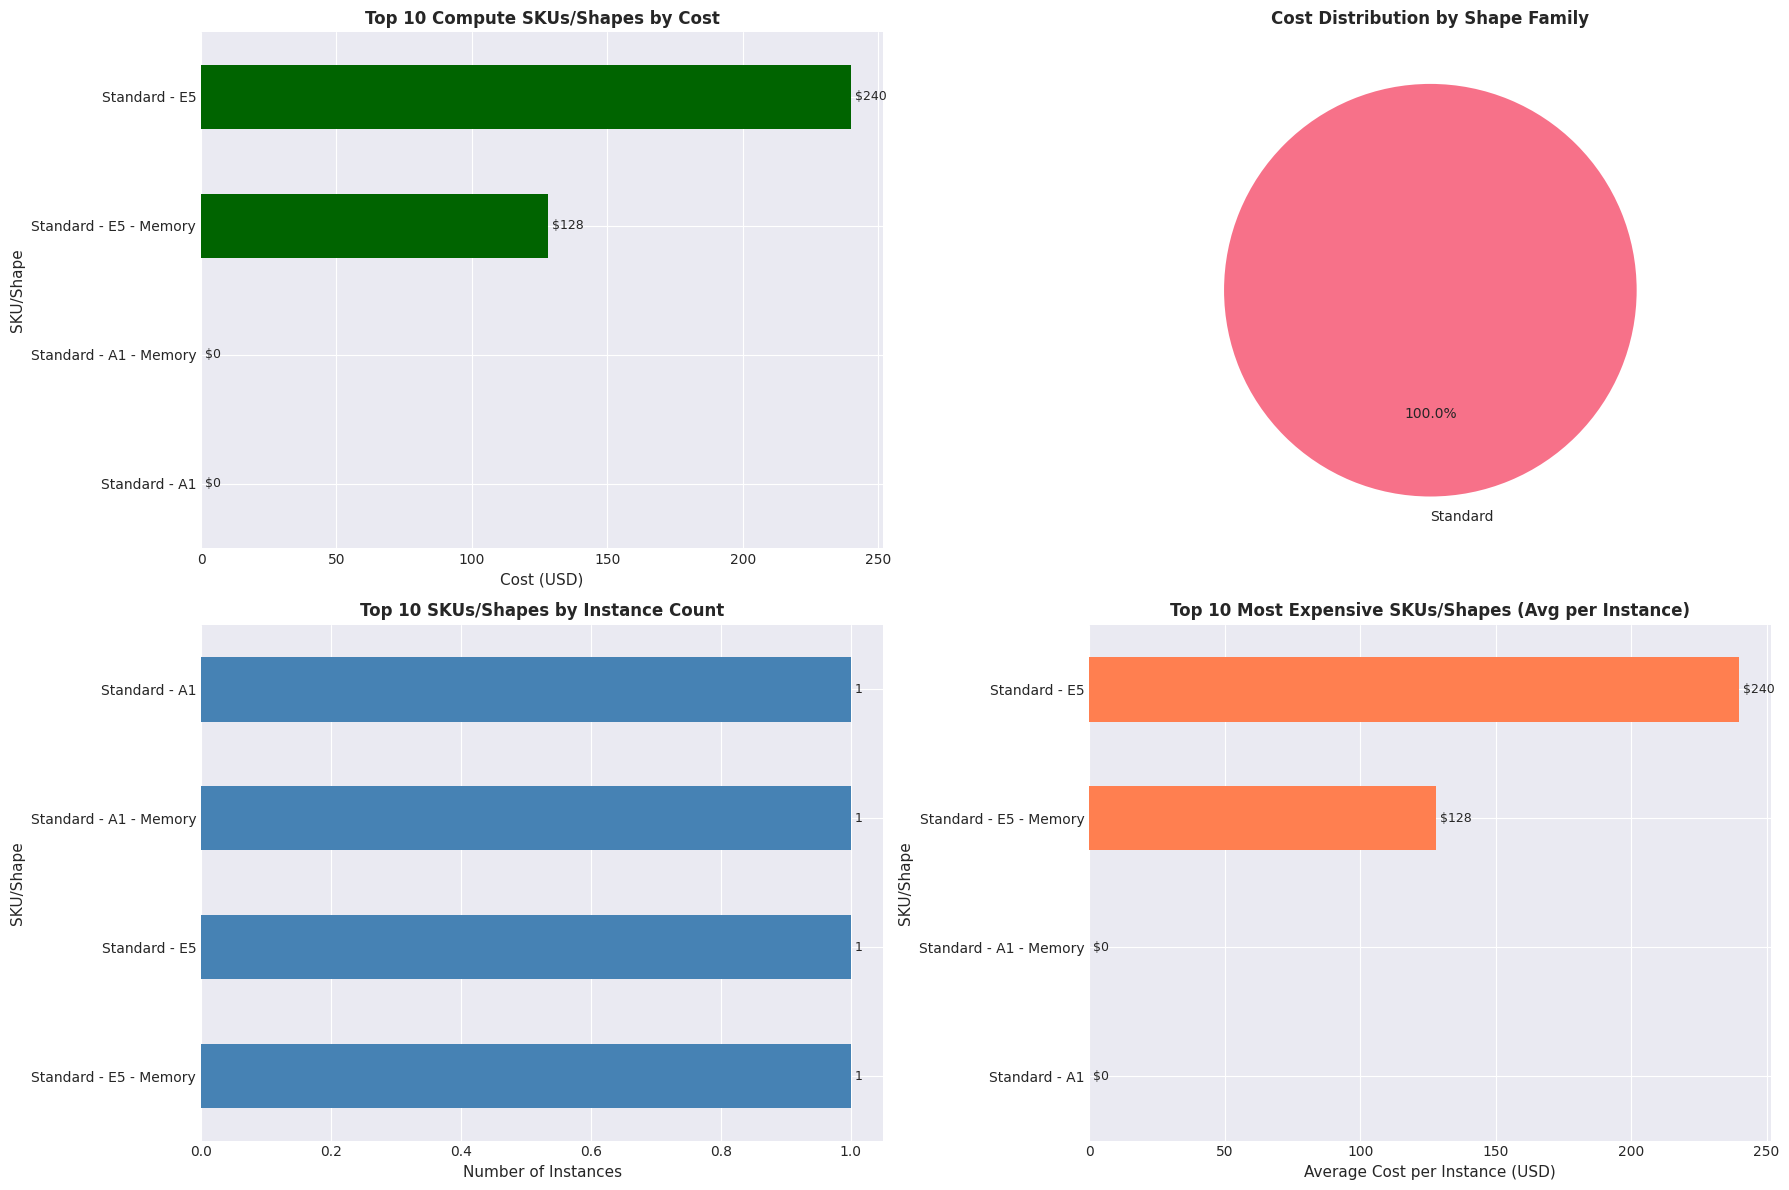


⚡ SKU/Shape Efficiency Analysis:

Top 10 SKUs/Shapes - Cost vs Usage Metrics:
SKU/Shape                                            Total Cost  Total Hours     $/Hour  Instances
----------------------------------------------------------------------------------------------------
Standard - E5                                      $     239.82      7,994.1 $     0.03          1
Standard - E5 - Memory                             $     127.91     63,953.0 $     0.00          1
Standard - A1 - Memory                             $       0.00     25,920.0 $     0.00          1
Standard - A1                                      $       0.00      4,320.0 $     0.00          1


In [13]:
# Filter compute resources
compute_df = df[df['service'] == 'Compute'].copy()

if len(compute_df) > 0:
    # Use skuName for shape analysis (more detailed than shape_from_call2)
    # Fill missing skuName with shape_from_call2 as fallback
    compute_df['shape_name'] = compute_df['skuName'].fillna(compute_df['shape_from_call2'])
    
    shape_costs = compute_df.groupby('shape_name')['computedAmount'].sum().sort_values(ascending=False).head(10)
    
    print("\n💻 Compute Instance Analysis:")
    print("="*80)
    print(f"Total Compute Cost:     ${compute_df['computedAmount'].sum():,.2f}")
    print(f"Unique Instances:       {compute_df['resourceId'].nunique():,}")
    print(f"Unique SKUs/Shapes:     {compute_df['shape_name'].nunique():,}")
    
    # Shape category analysis (extract shape family from skuName or shape)
    compute_df['shape_family'] = compute_df['shape_name'].str.extract(r'^(VM\.|BM\.)?([A-Za-z0-9]+)')[1]
    shape_family_costs = compute_df.groupby('shape_family')['computedAmount'].sum().sort_values(ascending=False)
    
    print("\n🔢 Top 10 SKUs/Shapes by Cost:")
    for idx, (shape, cost) in enumerate(shape_costs.items(), 1):
        instances = compute_df[compute_df['shape_name'] == shape]['resourceId'].nunique()
        avg_cost = cost / instances if instances > 0 else 0
        print(f"{idx:2d}. {shape:50s} ${cost:>12,.2f} ({instances:>3} instances, ${avg_cost:>8,.2f}/instance)")
    
    print("\n📊 Cost by Shape Family:")
    for idx, (family, cost) in enumerate(shape_family_costs.head(10).items(), 1):
        pct = (cost/compute_df['computedAmount'].sum())*100
        instances = compute_df[compute_df['shape_family'] == family]['resourceId'].nunique()
        print(f"{idx:2d}. {family:20s} ${cost:>12,.2f} ({pct:>5.1f}%) - {instances} instances")
    
    # Shape distribution by region
    print("\n🌍 Top SKUs/Shapes by Region:")
    shape_region = compute_df.groupby(['region_from_call2', 'shape_name'])['computedAmount'].sum().reset_index()
    shape_region = shape_region.sort_values('computedAmount', ascending=False).head(10)
    for idx, row in shape_region.iterrows():
        print(f"   {row['region_from_call2']:20s} | {row['shape_name']:50s} | ${row['computedAmount']:>10,.2f}")
    
    # Only create visualizations if there's meaningful cost data
    if compute_df['computedAmount'].sum() > 0:
        # Visualization - Multiple charts
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(18, 12))
        
        # 1. Top 10 shapes by cost
        shape_costs.plot(kind='barh', ax=ax1, color='darkgreen')
        ax1.set_xlabel('Cost (USD)', fontsize=11)
        ax1.set_ylabel('SKU/Shape', fontsize=11)
        ax1.set_title('Top 10 Compute SKUs/Shapes by Cost', fontsize=12, fontweight='bold')
        ax1.invert_yaxis()
        for i, v in enumerate(shape_costs.values):
            ax1.text(v, i, f' ${v:,.0f}', va='center', fontsize=9)
        
        # 2. Shape family distribution (pie chart)
        top_families = shape_family_costs.head(8)
        other_cost = shape_family_costs[8:].sum()
        if other_cost > 0:
            plot_data = pd.concat([top_families, pd.Series({'Others': other_cost})])
        else:
            plot_data = top_families
        ax2.pie(plot_data.values, labels=plot_data.index, autopct='%1.1f%%', startangle=90)
        ax2.set_title('Cost Distribution by Shape Family', fontsize=12, fontweight='bold')
        
        # 3. Instance count by shape
        shape_counts = compute_df.groupby('shape_name')['resourceId'].nunique().sort_values(ascending=False).head(10)
        shape_counts.plot(kind='barh', ax=ax3, color='steelblue')
        ax3.set_xlabel('Number of Instances', fontsize=11)
        ax3.set_ylabel('SKU/Shape', fontsize=11)
        ax3.set_title('Top 10 SKUs/Shapes by Instance Count', fontsize=12, fontweight='bold')
        ax3.invert_yaxis()
        for i, v in enumerate(shape_counts.values):
            ax3.text(v, i, f' {v}', va='center', fontsize=9)
        
        # 4. Average cost per instance by shape
        shape_avg_cost = compute_df.groupby('shape_name').agg({
            'computedAmount': 'sum',
            'resourceId': 'nunique'
        })
        shape_avg_cost['avg_cost'] = shape_avg_cost['computedAmount'] / shape_avg_cost['resourceId']
        shape_avg_cost = shape_avg_cost.sort_values('avg_cost', ascending=False).head(10)
        
        shape_avg_cost['avg_cost'].plot(kind='barh', ax=ax4, color='coral')
        ax4.set_xlabel('Average Cost per Instance (USD)', fontsize=11)
        ax4.set_ylabel('SKU/Shape', fontsize=11)
        ax4.set_title('Top 10 Most Expensive SKUs/Shapes (Avg per Instance)', fontsize=12, fontweight='bold')
        ax4.invert_yaxis()
        for i, v in enumerate(shape_avg_cost['avg_cost'].values):
            ax4.text(v, i, f' ${v:,.0f}', va='center', fontsize=9)
        
        plt.tight_layout()
        plt.show()
    else:
        print("\n📊 Skipping visualizations - all costs are zero")
    
    # Shape efficiency analysis
    print("\n⚡ SKU/Shape Efficiency Analysis:")
    print("="*80)
    shape_efficiency = compute_df.groupby('shape_name').agg({
        'computedAmount': 'sum',
        'computedQuantity': 'sum',
        'resourceId': 'nunique'
    }).reset_index()
    shape_efficiency['cost_per_unit'] = shape_efficiency['computedAmount'] / shape_efficiency['computedQuantity'].replace(0, 1)
    shape_efficiency = shape_efficiency.sort_values('computedAmount', ascending=False).head(10)
    
    print("\nTop 10 SKUs/Shapes - Cost vs Usage Metrics:")
    print(f"{'SKU/Shape':<50} {'Total Cost':>12} {'Total Hours':>12} {'$/Hour':>10} {'Instances':>10}")
    print("-"*100)
    for _, row in shape_efficiency.iterrows():
        print(f"{row['shape_name']:<50} ${row['computedAmount']:>11,.2f} {row['computedQuantity']:>12,.1f} ${row['cost_per_unit']:>9,.2f} {row['resourceId']:>10}")
    
else:
    print("\n⚠️ No compute resources found in the dataset")

## 9a. Top Resource Consumers Analysis


🏆 Top 20 Resource Consumers by Cost:
Rank  Resource Name                       Service              Region                  Cost Compartment              
------------------------------------------------------------------------------------------------------------------------
1     ACFORALNX01                         Compute              us-phoenix-1    $     367.73 PROCESOS                 
2     ACFLNXAUT01                         Compute              us-phoenix-1    $       0.00 PROCESOS                 

📊 Summary:
Total cost of Top 20 resources:     $367.73
Percentage of total cost:           0.3%
Average cost per resource (Top 20): $183.86


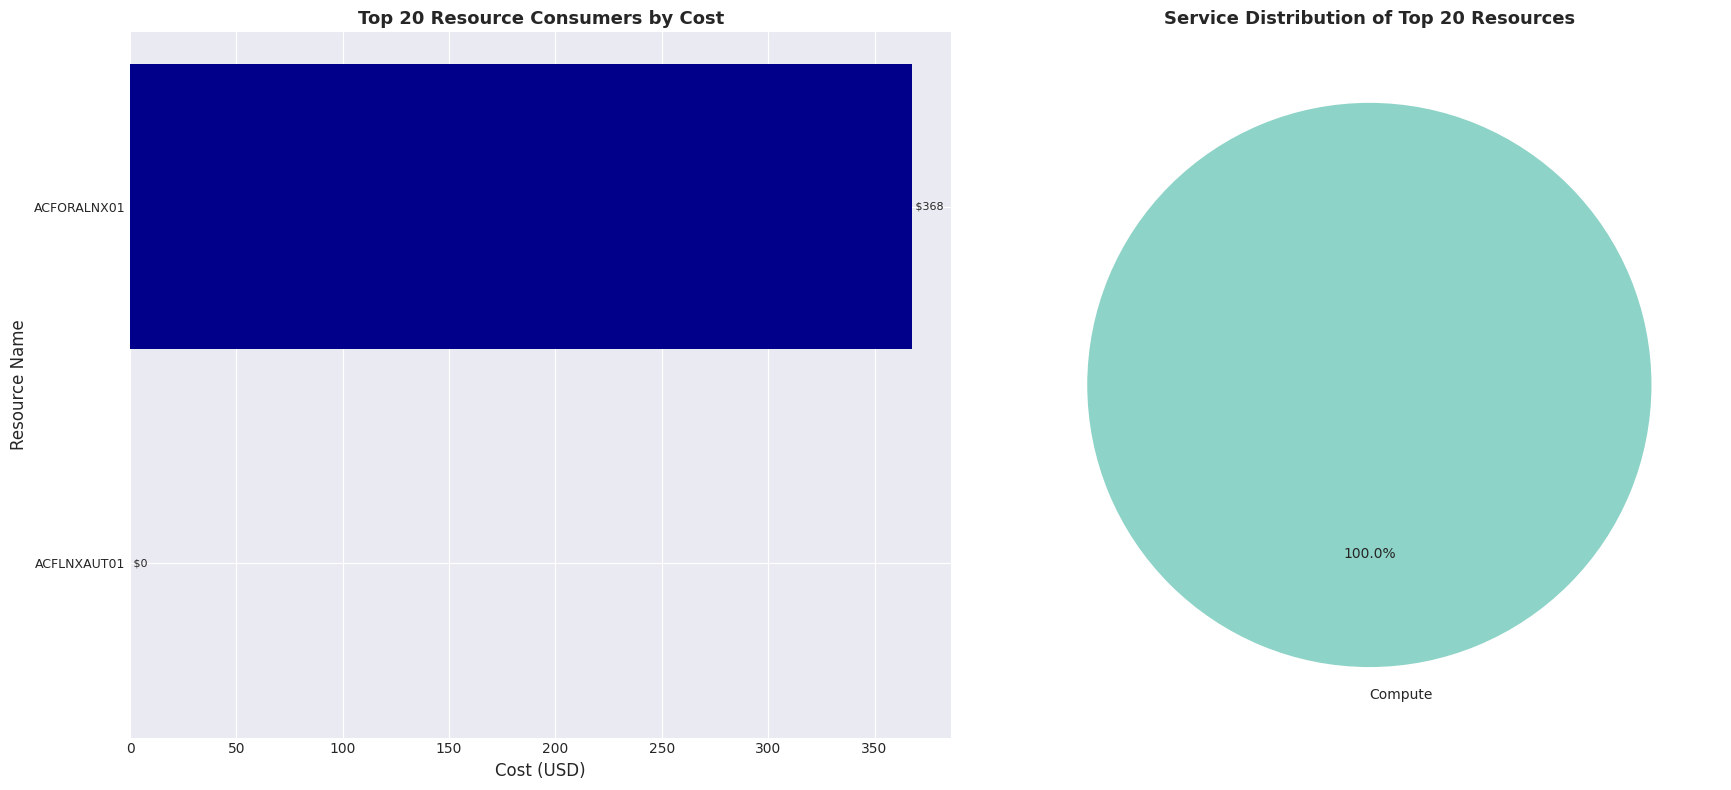


📦 Top 20 Resources - Breakdown by Service:
  Compute                   2.0 resources | $      367.73

🌍 Top 20 Resources - Regional Distribution:
  us-phoenix-1              2.0 resources | $      367.73


In [14]:
# Top 20 resource consumers by cost
resource_costs = df.groupby(['resourceName', 'service', 'region_from_call2']).agg({
    'computedAmount': 'sum',
    'computedQuantity': 'sum',
    'resourceId': 'first',
    'compartment_name_clean': 'first'
}).reset_index()
resource_costs = resource_costs.sort_values('computedAmount', ascending=False).head(20)

print("\n🏆 Top 20 Resource Consumers by Cost:")
print("="*120)
print(f"{'Rank':<5} {'Resource Name':<35} {'Service':<20} {'Region':<15} {'Cost':>12} {'Compartment':<25}")
print("-"*120)

for idx, row in resource_costs.iterrows():
    rank = resource_costs.index.get_loc(idx) + 1
    resource_name = str(row['resourceName'])[:33] if pd.notna(row['resourceName']) else 'N/A'
    service = str(row['service'])[:18]
    region = str(row['region_from_call2'])[:13]
    cost = row['computedAmount']
    compartment = str(row['compartment_name_clean'])[:23]
    
    print(f"{rank:<5} {resource_name:<35} {service:<20} {region:<15} ${cost:>11,.2f} {compartment:<25}")

# Calculate statistics
total_top20_cost = resource_costs['computedAmount'].sum()
pct_of_total = (total_top20_cost / df['computedAmount'].sum()) * 100

print("\n📊 Summary:")
print(f"Total cost of Top 20 resources:     ${total_top20_cost:,.2f}")
print(f"Percentage of total cost:           {pct_of_total:.1f}%")
print(f"Average cost per resource (Top 20): ${resource_costs['computedAmount'].mean():,.2f}")

# Visualization - Top 20 resources
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 8))

# Bar chart of top 20
resource_names_short = resource_costs['resourceName'].apply(lambda x: str(x)[:30] + '...' if pd.notna(x) and len(str(x)) > 30 else str(x))
ax1.barh(range(len(resource_costs)), resource_costs['computedAmount'], color='darkblue')
ax1.set_yticks(range(len(resource_costs)))
ax1.set_yticklabels(resource_names_short, fontsize=9)
ax1.set_xlabel('Cost (USD)', fontsize=12)
ax1.set_ylabel('Resource Name', fontsize=12)
ax1.set_title('Top 20 Resource Consumers by Cost', fontsize=13, fontweight='bold')
ax1.invert_yaxis()
for i, v in enumerate(resource_costs['computedAmount'].values):
    ax1.text(v, i, f' ${v:,.0f}', va='center', fontsize=8)

# Service distribution for top 20
service_dist = resource_costs.groupby('service')['computedAmount'].sum().sort_values(ascending=False)
colors = plt.cm.Set3(range(len(service_dist)))
ax2.pie(service_dist.values, labels=service_dist.index, autopct='%1.1f%%', startangle=90, colors=colors)
ax2.set_title('Service Distribution of Top 20 Resources', fontsize=13, fontweight='bold')

plt.tight_layout()
plt.show()

# Additional breakdown by service
print("\n📦 Top 20 Resources - Breakdown by Service:")
service_breakdown = resource_costs.groupby('service').agg({
    'computedAmount': 'sum',
    'resourceName': 'count'
}).sort_values('computedAmount', ascending=False)
service_breakdown.columns = ['Total_Cost', 'Resource_Count']

for service, row in service_breakdown.iterrows():
    print(f"  {service:25s} {row['Resource_Count']:>2} resources | ${row['Total_Cost']:>12,.2f}")

# Regional distribution
print("\n🌍 Top 20 Resources - Regional Distribution:")
region_breakdown = resource_costs.groupby('region_from_call2').agg({
    'computedAmount': 'sum',
    'resourceName': 'count'
}).sort_values('computedAmount', ascending=False)
region_breakdown.columns = ['Total_Cost', 'Resource_Count']

for region, row in region_breakdown.iterrows():
    print(f"  {region:25s} {row['Resource_Count']:>2} resources | ${row['Total_Cost']:>12,.2f}")

## 10. Storage Analysis

## 9b. Database Resources Analysis


🗄️ Database Resources Analysis:
Total Database Cost:        $103,933.94
Total Database Instances:   5
Database Service Types:     1

📊 Database Costs by Service Type:
1. Database                                 $  103,933.94 (100.0%) - 5 instances

💾 Database SKUs/Shapes Analysis:
 1. Exadata X9M Quarter Rack Instance Meter            $   84,658.48 (  1 instances, $84,658.48/instance)
 2. Database Exadata XP - Additional OCPUs             $   19,275.47 (  4 instances, $4,818.87/instance)
 3. Exadata X9M Additional Compute Instance Meter      $        0.00 (  1 instances, $    0.00/instance)
 4. Exadata X9M Additional Storage Instance Meter      $        0.00 (  1 instances, $    0.00/instance)

📦 Database Costs by Compartment:
Rank  Compartment                                 Cost  Instances
      Full Path                                                                                           
-----------------------------------------------------------------------------------------

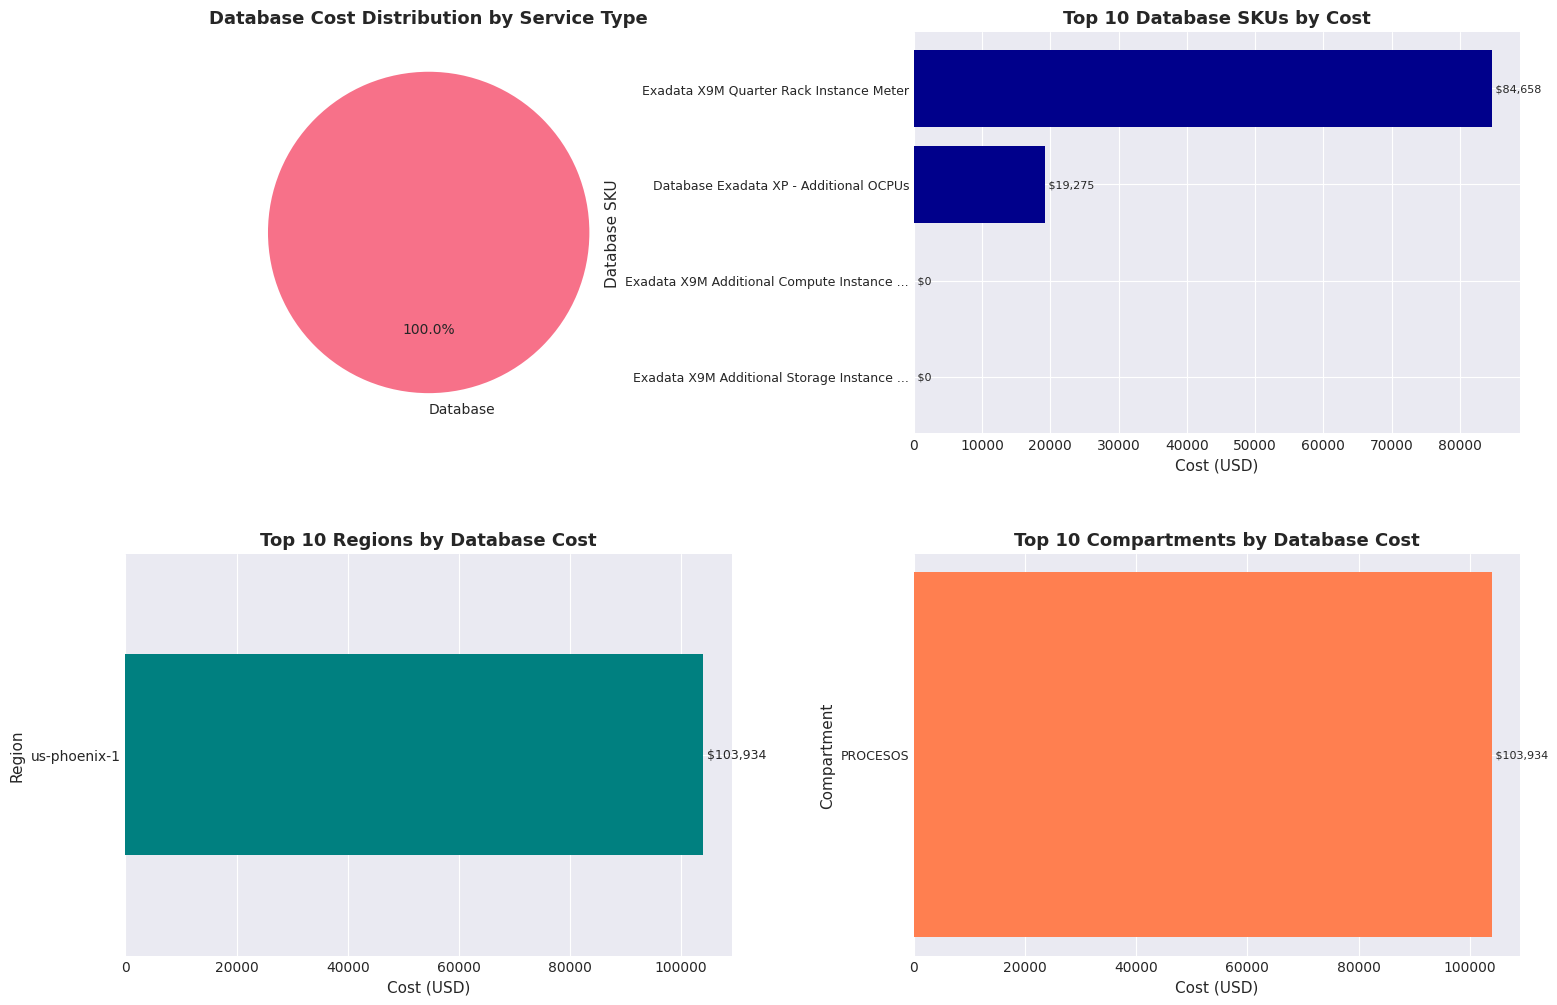


⚡ Database Efficiency Analysis:

Top 10 Database Resources - Cost vs Usage Metrics:
Resource Name                            Service                     Total Cost  Total Hours     $/Hour
------------------------------------------------------------------------------------------------------------------------

📈 Database Summary Statistics:
Total Database Cost:             $103,933.94
Average Cost per Database:       $20,786.79
Most Expensive Database:         $84,658.48
Total Database Service Types:    1
Total Compartments with DBs:     1
Total Regions with DBs:          1


In [15]:
# Filter database services
database_services = ['Database', 'Autonomous Database', 'MySQL Database Service', 'NoSQL Database', 
                     'Oracle Database Service', 'PostgreSQL Database Service']
database_df = df[df['service'].str.contains('Database', case=False, na=False)].copy()

if len(database_df) > 0:
    # Identify unique database services in the data
    actual_db_services = database_df['service'].unique()
    
    print("\n🗄️ Database Resources Analysis:")
    print("="*120)
    print(f"Total Database Cost:        ${database_df['computedAmount'].sum():,.2f}")
    print(f"Total Database Instances:   {database_df['resourceId'].nunique():,}")
    print(f"Database Service Types:     {database_df['service'].nunique()}")
    
    # Database costs by service type
    print("\n📊 Database Costs by Service Type:")
    db_service_costs = database_df.groupby('service')['computedAmount'].sum().sort_values(ascending=False)
    for idx, (service, cost) in enumerate(db_service_costs.items(), 1):
        pct = (cost/database_df['computedAmount'].sum())*100
        instances = database_df[database_df['service'] == service]['resourceId'].nunique()
        print(f"{idx}. {service:40s} ${cost:>12,.2f} ({pct:>5.1f}%) - {instances} instances")
    
    # Database resources by SKU
    print("\n💾 Database SKUs/Shapes Analysis:")
    database_df['db_sku'] = database_df['skuName'].fillna(database_df['shape_from_call2'])
    db_sku_costs = database_df.groupby('db_sku')['computedAmount'].sum().sort_values(ascending=False).head(10)
    
    for idx, (sku, cost) in enumerate(db_sku_costs.items(), 1):
        instances = database_df[database_df['db_sku'] == sku]['resourceId'].nunique()
        avg_cost = cost / instances if instances > 0 else 0
        print(f"{idx:2d}. {str(sku)[:50]:50s} ${cost:>12,.2f} ({instances:>3} instances, ${avg_cost:>8,.2f}/instance)")
    
    # Database resources by compartment
    print("\n📦 Database Costs by Compartment:")
    db_compartment = database_df.groupby(['compartment_name_clean', 'compartmentPath']).agg({
        'computedAmount': 'sum',
        'resourceId': 'nunique',
        'resourceName': lambda x: list(x.unique())[:3]  # Sample of resource names
    }).sort_values('computedAmount', ascending=False).head(10)
    
    print(f"{'Rank':<5} {'Compartment':<35} {'Cost':>12} {'Instances':>10}")
    print(f"{'':5} {'Full Path':<100}")
    print("-"*120)
    for idx, (comp_tuple, row) in enumerate(db_compartment.iterrows(), 1):
        comp_name, comp_path = comp_tuple
        pct = (row['computedAmount']/database_df['computedAmount'].sum())*100
        print(f"{idx:<5} {comp_name[:33]:<35} ${row['computedAmount']:>11,.2f} {row['resourceId']:>10} ({pct:>4.1f}%)")
        print(f"{'':5} {comp_path[:98]}")
        print()
    
    # Database resources by region
    print("\n🌍 Database Costs by Region:")
    db_region = database_df.groupby('region_from_call2').agg({
        'computedAmount': 'sum',
        'resourceId': 'nunique'
    }).sort_values('computedAmount', ascending=False)
    
    for idx, (region, row) in enumerate(db_region.iterrows(), 1):
        pct = (row['computedAmount']/database_df['computedAmount'].sum())*100
        print(f"{idx:2d}. {region:30s} ${row['computedAmount']:>12,.2f} ({pct:>5.1f}%) - {row['resourceId']} instances")
    
    # Top 15 database resources by cost
    print("\n🏆 Top 15 Database Resources by Cost:")
    db_resources = database_df.groupby(['resourceName', 'service', 'region_from_call2', 'compartment_name_clean']).agg({
        'computedAmount': 'sum',
        'computedQuantity': 'sum'
    }).reset_index().sort_values('computedAmount', ascending=False).head(15)
    
    print(f"{'Rank':<5} {'Resource Name':<35} {'Service':<25} {'Region':<15} {'Cost':>12}")
    print(f"{'':5} {'Compartment':<100}")
    print("-"*120)
    for idx, row in db_resources.iterrows():
        rank = idx + 1
        resource_name = str(row['resourceName'])[:33] if pd.notna(row['resourceName']) else 'N/A'
        service = str(row['service'])[:23]
        region = str(row['region_from_call2'])[:13]
        print(f"{rank:<5} {resource_name:<35} {service:<25} {region:<15} ${row['computedAmount']:>11,.2f}")
        print(f"{'':5} {str(row['compartment_name_clean'])[:98]}")
        print()
    
    # Only create visualizations if there's meaningful cost data
    if database_df['computedAmount'].sum() > 0:
        # Visualization - Multiple charts
        fig = plt.figure(figsize=(18, 12))
        gs = fig.add_gridspec(2, 2, hspace=0.3, wspace=0.3)
        
        # 1. Database costs by service type (pie chart)
        ax1 = fig.add_subplot(gs[0, 0])
        ax1.pie(db_service_costs.values, labels=db_service_costs.index, autopct='%1.1f%%', startangle=90)
        ax1.set_title('Database Cost Distribution by Service Type', fontsize=13, fontweight='bold')
        
        # 2. Top 10 database SKUs by cost (horizontal bar)
        ax2 = fig.add_subplot(gs[0, 1])
        db_sku_plot = db_sku_costs.head(10)
        db_sku_labels = [str(x)[:40] + '...' if len(str(x)) > 40 else str(x) for x in db_sku_plot.index]
        ax2.barh(range(len(db_sku_plot)), db_sku_plot.values, color='darkblue')
        ax2.set_yticks(range(len(db_sku_plot)))
        ax2.set_yticklabels(db_sku_labels, fontsize=9)
        ax2.set_xlabel('Cost (USD)', fontsize=11)
        ax2.set_ylabel('Database SKU', fontsize=11)
        ax2.set_title('Top 10 Database SKUs by Cost', fontsize=13, fontweight='bold')
        ax2.invert_yaxis()
        for i, v in enumerate(db_sku_plot.values):
            ax2.text(v, i, f' ${v:,.0f}', va='center', fontsize=8)
        
        # 3. Database costs by region (horizontal bar)
        ax3 = fig.add_subplot(gs[1, 0])
        db_region_plot = db_region['computedAmount'].head(10)
        db_region_plot.plot(kind='barh', ax=ax3, color='teal')
        ax3.set_xlabel('Cost (USD)', fontsize=11)
        ax3.set_ylabel('Region', fontsize=11)
        ax3.set_title('Top 10 Regions by Database Cost', fontsize=13, fontweight='bold')
        ax3.invert_yaxis()
        for i, v in enumerate(db_region_plot.values):
            ax3.text(v, i, f' ${v:,.0f}', va='center', fontsize=9)
        
        # 4. Database costs by compartment (horizontal bar)
        ax4 = fig.add_subplot(gs[1, 1])
        db_comp_plot = db_compartment['computedAmount'].head(10)
        comp_labels = [str(x[0])[:30] for x in db_comp_plot.index]
        ax4.barh(range(len(db_comp_plot)), db_comp_plot.values, color='coral')
        ax4.set_yticks(range(len(db_comp_plot)))
        ax4.set_yticklabels(comp_labels, fontsize=9)
        ax4.set_xlabel('Cost (USD)', fontsize=11)
        ax4.set_ylabel('Compartment', fontsize=11)
        ax4.set_title('Top 10 Compartments by Database Cost', fontsize=13, fontweight='bold')
        ax4.invert_yaxis()
        for i, v in enumerate(db_comp_plot.values):
            ax4.text(v, i, f' ${v:,.0f}', va='center', fontsize=8)
        
        plt.tight_layout()
        plt.show()
    else:
        print("\n📊 Skipping visualizations - all costs are zero")
    
    # Database efficiency analysis
    print("\n⚡ Database Efficiency Analysis:")
    print("="*120)
    db_efficiency = database_df.groupby(['resourceName', 'service']).agg({
        'computedAmount': 'sum',
        'computedQuantity': 'sum'
    }).reset_index()
    db_efficiency['cost_per_unit'] = db_efficiency['computedAmount'] / db_efficiency['computedQuantity'].replace(0, 1)
    db_efficiency = db_efficiency.sort_values('computedAmount', ascending=False).head(10)
    
    print("\nTop 10 Database Resources - Cost vs Usage Metrics:")
    print(f"{'Resource Name':<40} {'Service':<25} {'Total Cost':>12} {'Total Hours':>12} {'$/Hour':>10}")
    print("-"*120)
    for _, row in db_efficiency.iterrows():
        resource_name = str(row['resourceName'])[:38] if pd.notna(row['resourceName']) else 'N/A'
        service = str(row['service'])[:23]
        print(f"{resource_name:<40} {service:<25} ${row['computedAmount']:>11,.2f} {row['computedQuantity']:>12,.1f} ${row['cost_per_unit']:>9,.2f}")
    
    # Summary statistics
    print("\n📈 Database Summary Statistics:")
    print(f"Total Database Cost:             ${database_df['computedAmount'].sum():,.2f}")
    print(f"Average Cost per Database:       ${database_df.groupby('resourceId')['computedAmount'].sum().mean():,.2f}")
    print(f"Most Expensive Database:         ${database_df.groupby('resourceId')['computedAmount'].sum().max():,.2f}")
    print(f"Total Database Service Types:    {database_df['service'].nunique()}")
    print(f"Total Compartments with DBs:     {database_df['compartment_name_clean'].nunique()}")
    print(f"Total Regions with DBs:          {database_df['region_from_call2'].nunique()}")
    
else:
    print("\n⚠️ No database resources found in the dataset")


💾 Storage Analysis:
Total Storage Cost:     $2,910.61
Total Storage Usage:    18,455.28 units

📊 Storage Costs by Type:
1. File Storage                   $    2,776.57 ( 95.4%) | Usage:     9,255.22
2. Object Storage                 $      134.05 (  4.6%) | Usage:     8,794.98
3. Block Storage                  $        0.00 (  0.0%) | Usage:       405.07

📦 Storage Costs by Compartment (with Full Path):
Rank  Compartment                            Cost        Usage  Resources
      Full Path                                                                                           
------------------------------------------------------------------------------------------------------------------------
1     PROCESOS                       $   2,910.61     18,455.3          9 (100.0%)
      acfin/PROCESOS

2     acfin                          $       0.00          0.0          1 ( 0.0%)
      acfin


🔍 Top 10 Storage Service-Compartment Combinations:
Rank  Service              Compartment

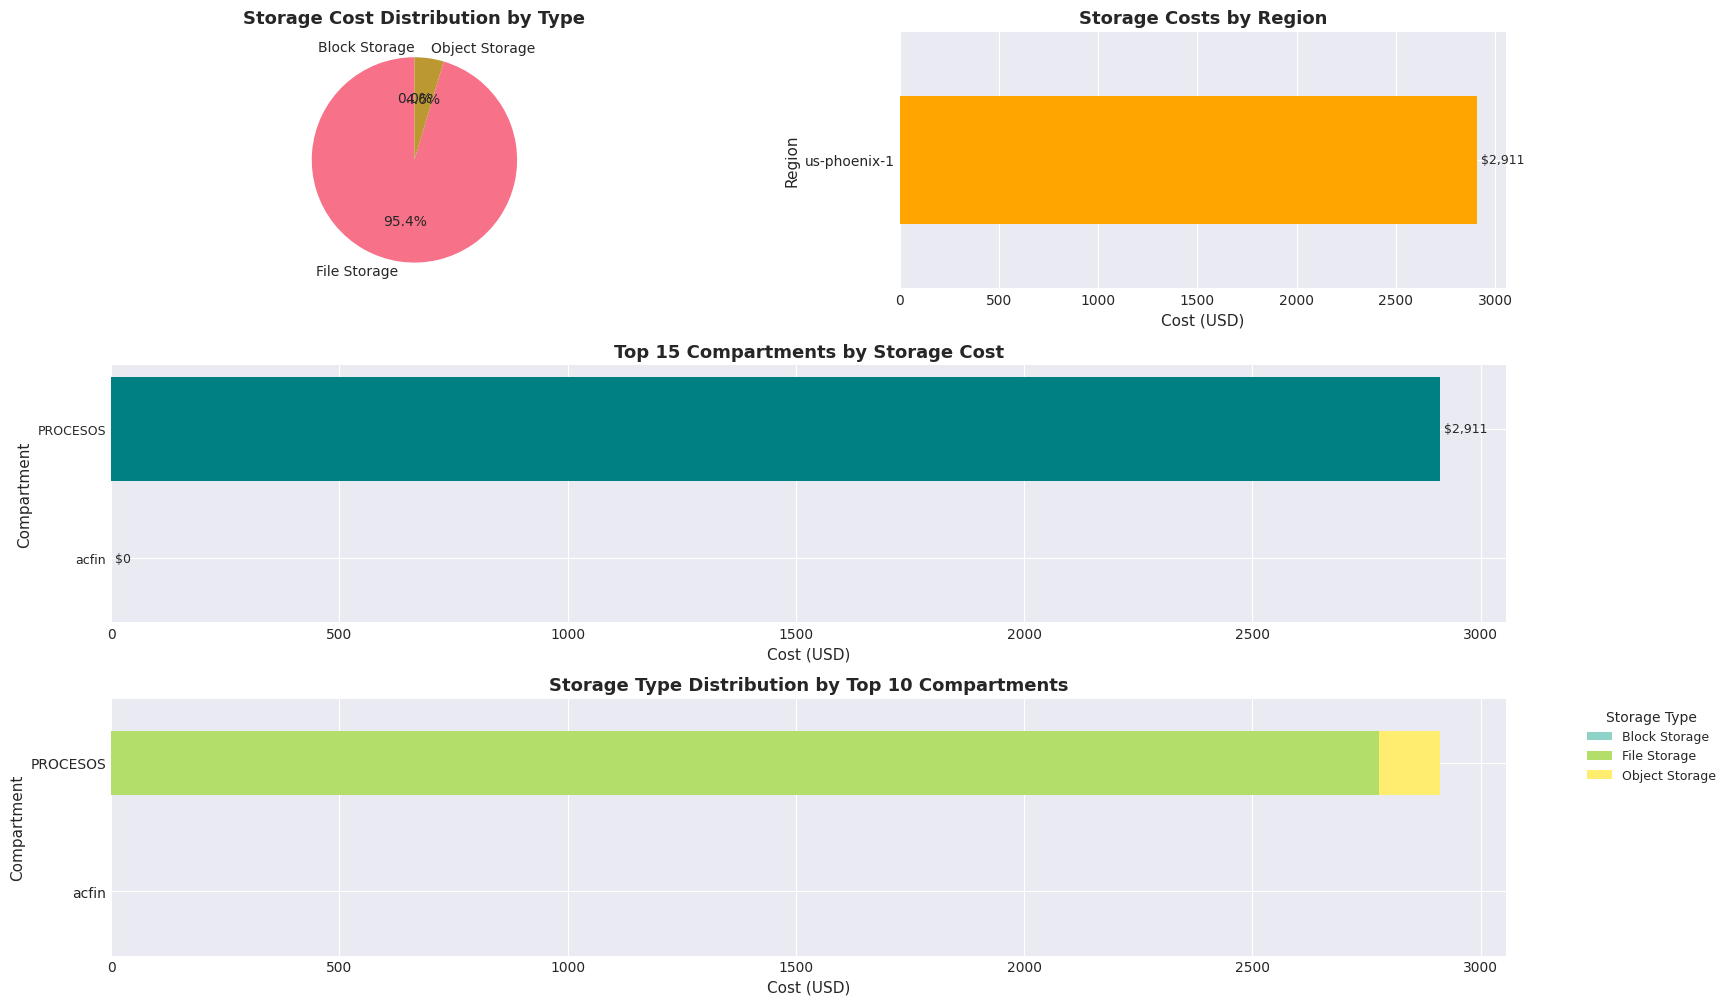


📈 Storage Summary by Compartment:
Total Compartments with Storage:  2
Average Cost per Compartment:     $1,455.31
Top Compartment Cost:             $2,910.61
Top Compartment Usage:            18,455.28 units


In [16]:
# Filter storage services
storage_services = ['Block Storage', 'Object Storage', 'File Storage', 'Archive Storage']
storage_df = df[df['service'].isin(storage_services)].copy()

if len(storage_df) > 0:
    storage_costs = storage_df.groupby('service')['computedAmount'].sum().sort_values(ascending=False)
    
    print("\n💾 Storage Analysis:")
    print("="*120)
    print(f"Total Storage Cost:     ${storage_df['computedAmount'].sum():,.2f}")
    print(f"Total Storage Usage:    {storage_df['computedQuantity'].sum():,.2f} units")
    
    print("\n📊 Storage Costs by Type:")
    for idx, (service, cost) in enumerate(storage_costs.items(), 1):
        pct = (cost/storage_df['computedAmount'].sum())*100
        usage = storage_df[storage_df['service'] == service]['computedQuantity'].sum()
        print(f"{idx}. {service:30s} ${cost:>12,.2f} ({pct:>5.1f}%) | Usage: {usage:>12,.2f}")
    
    # Storage by compartment with full path
    print("\n📦 Storage Costs by Compartment (with Full Path):")
    storage_compartment = storage_df.groupby(['compartment_name_clean', 'compartmentPath']).agg({
        'computedAmount': 'sum',
        'computedQuantity': 'sum',
        'resourceId': 'nunique'
    }).reset_index().sort_values('computedAmount', ascending=False).head(15)
    
    print(f"{'Rank':<5} {'Compartment':<30} {'Cost':>12} {'Usage':>12} {'Resources':>10}")
    print(f"{'':5} {'Full Path':<100}")
    print("-"*120)
    for idx, row in storage_compartment.iterrows():
        rank = idx + 1
        pct = (row['computedAmount']/storage_df['computedAmount'].sum())*100
        print(f"{rank:<5} {row['compartment_name_clean'][:28]:<30} ${row['computedAmount']:>11,.2f} {row['computedQuantity']:>12,.1f} {row['resourceId']:>10} ({pct:>4.1f}%)")
        print(f"{'':5} {row['compartmentPath'][:98]}")
        print()
    
    # Storage by service and compartment (top combinations) with full path
    print("\n🔍 Top 10 Storage Service-Compartment Combinations:")
    service_comp = storage_df.groupby(['service', 'compartment_name_clean', 'compartmentPath']).agg({
        'computedAmount': 'sum'
    }).reset_index().sort_values('computedAmount', ascending=False).head(10)
    
    print(f"{'Rank':<5} {'Service':<20} {'Compartment':<30} {'Cost':>12}")
    print(f"{'':5} {'Full Path':<100}")
    print("-"*120)
    for idx, row in service_comp.iterrows():
        rank = idx + 1
        print(f"{rank:<5} {row['service']:<20} {row['compartment_name_clean'][:28]:<30} ${row['computedAmount']:>11,.2f}")
        print(f"{'':5} {row['compartmentPath'][:98]}")
        print()
    
    # Only create visualizations if there's meaningful cost data
    if storage_df['computedAmount'].sum() > 0:
        # Visualization - Multiple charts
        fig = plt.figure(figsize=(18, 12))
        gs = fig.add_gridspec(3, 2, hspace=0.3, wspace=0.3)
        
        # 1. Pie chart - Storage type distribution
        ax1 = fig.add_subplot(gs[0, 0])
        ax1.pie(storage_costs.values, labels=storage_costs.index, autopct='%1.1f%%', startangle=90)
        ax1.set_title('Storage Cost Distribution by Type', fontsize=13, fontweight='bold')
        
        # 2. Bar chart - Storage by region
        ax2 = fig.add_subplot(gs[0, 1])
        storage_region = storage_df.groupby('region_from_call2')['computedAmount'].sum().sort_values(ascending=False).head(10)
        storage_region.plot(kind='barh', ax=ax2, color='orange')
        ax2.set_xlabel('Cost (USD)', fontsize=11)
        ax2.set_ylabel('Region', fontsize=11)
        ax2.set_title('Storage Costs by Region', fontsize=13, fontweight='bold')
        ax2.invert_yaxis()
        for i, v in enumerate(storage_region.values):
            ax2.text(v, i, f' ${v:,.0f}', va='center', fontsize=9)
        
        # 3. Bar chart - Top 15 compartments
        ax3 = fig.add_subplot(gs[1, :])
        compartment_costs = storage_compartment.set_index('compartment_name_clean')['computedAmount']
        ax3.barh(range(len(compartment_costs)), compartment_costs.values, color='teal')
        ax3.set_yticks(range(len(compartment_costs)))
        ax3.set_yticklabels([str(x)[:38] for x in compartment_costs.index], fontsize=9)
        ax3.set_xlabel('Cost (USD)', fontsize=11)
        ax3.set_ylabel('Compartment', fontsize=11)
        ax3.set_title('Top 15 Compartments by Storage Cost', fontsize=13, fontweight='bold')
        ax3.invert_yaxis()
        for i, v in enumerate(compartment_costs.values):
            ax3.text(v, i, f' ${v:,.0f}', va='center', fontsize=9)
        
        # 4. Stacked bar - Storage types by compartment
        ax4 = fig.add_subplot(gs[2, :])
        top_comps = storage_compartment.head(10)['compartment_name_clean'].values
        storage_pivot = storage_df[storage_df['compartment_name_clean'].isin(top_comps)].pivot_table(
            index='compartment_name_clean', 
            columns='service', 
            values='computedAmount', 
            aggfunc='sum', 
            fill_value=0
        )
        storage_pivot = storage_pivot.reindex(top_comps)  # Maintain order
        storage_pivot.plot(kind='barh', stacked=True, ax=ax4, colormap='Set3')
        ax4.set_xlabel('Cost (USD)', fontsize=11)
        ax4.set_ylabel('Compartment', fontsize=11)
        ax4.set_title('Storage Type Distribution by Top 10 Compartments', fontsize=13, fontweight='bold')
        ax4.legend(title='Storage Type', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)
        ax4.invert_yaxis()
        
        plt.tight_layout()
        plt.show()
    else:
        print("\n📊 Skipping visualizations - all costs are zero")
    
    # Summary statistics by compartment
    print("\n📈 Storage Summary by Compartment:")
    print(f"Total Compartments with Storage:  {storage_df['compartment_name_clean'].nunique()}")
    print(f"Average Cost per Compartment:     ${storage_df.groupby('compartment_name_clean')['computedAmount'].sum().mean():,.2f}")
    print(f"Top Compartment Cost:             ${storage_compartment['computedAmount'].max():,.2f}")
    print(f"Top Compartment Usage:            {storage_compartment['computedQuantity'].max():,.2f} units")
    
else:
    print("\n⚠️ No storage resources found in the dataset")

## 11. Cost Anomaly Detection


⚠️ Cost Anomaly Detection:
Threshold: ±2 Standard Deviations from Mean
Mean Daily Cost:      $1,191.25
Standard Deviation:   $161.19
Upper Threshold:      $1,513.63
Lower Threshold:      $868.86

Anomalies Detected:   14

📅 Anomalous Days:
  2025-04-01 00:00:00: $1,544.87 (+29.7% from mean)
  2025-04-02 00:00:00: $1,545.38 (+29.7% from mean)
  2025-04-03 00:00:00: $1,545.38 (+29.7% from mean)
  2025-04-04 00:00:00: $1,545.38 (+29.7% from mean)
  2025-04-05 00:00:00: $1,545.38 (+29.7% from mean)
  2025-04-06 00:00:00: $1,545.38 (+29.7% from mean)
  2025-04-07 00:00:00: $1,546.58 (+29.8% from mean)
  2025-04-08 00:00:00: $1,549.79 (+30.1% from mean)
  2025-04-09 00:00:00: $1,549.79 (+30.1% from mean)
  2025-04-10 00:00:00: $1,549.79 (+30.1% from mean)
  2025-04-11 00:00:00: $1,549.79 (+30.1% from mean)
  2025-04-12 00:00:00: $1,549.79 (+30.1% from mean)
  2025-04-13 00:00:00: $1,549.79 (+30.1% from mean)
  2025-04-14 00:00:00: $1,549.79 (+30.1% from mean)


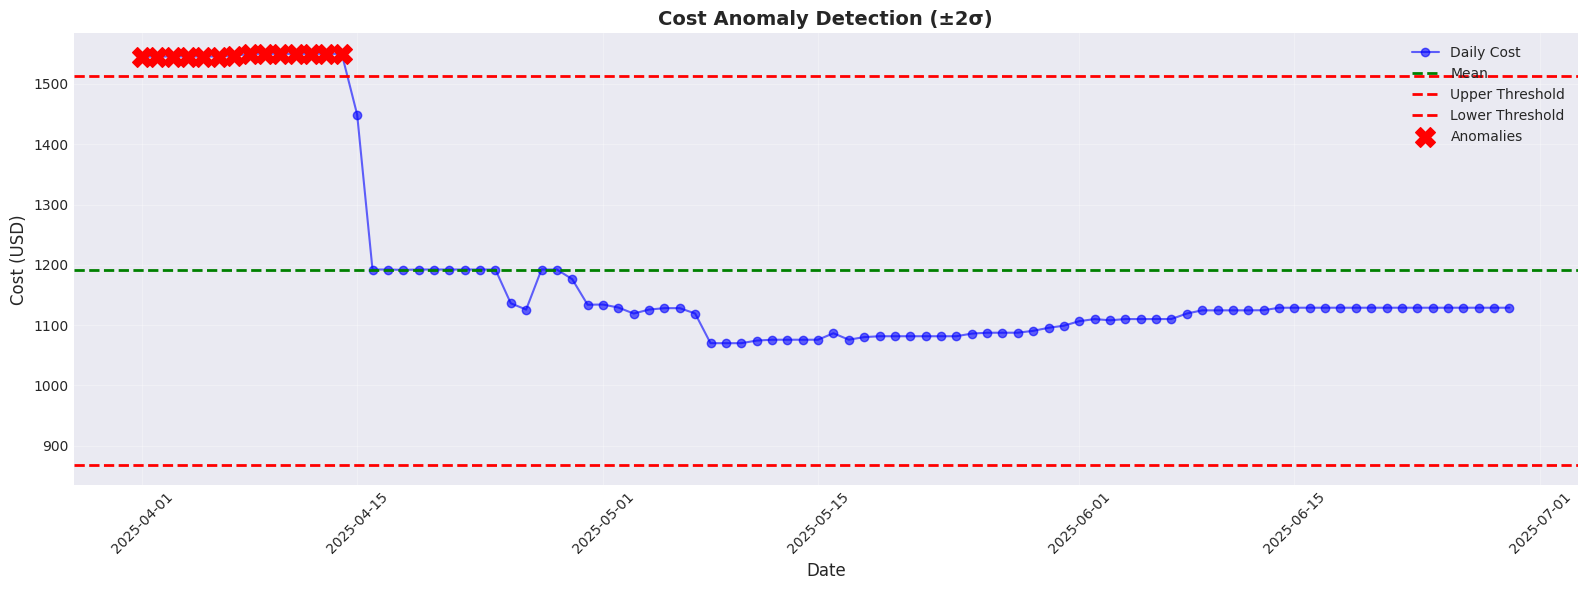

In [17]:
# Detect anomalies using statistical methods
daily_costs_sorted = daily_costs.sort_values('date').reset_index(drop=True)
mean_cost = daily_costs_sorted['computedAmount'].mean()
std_cost = daily_costs_sorted['computedAmount'].std()

# Define anomalies as values beyond 2 standard deviations
daily_costs_sorted['is_anomaly'] = np.abs(daily_costs_sorted['computedAmount'] - mean_cost) > (2 * std_cost)
anomalies = daily_costs_sorted[daily_costs_sorted['is_anomaly']]

print("\n⚠️ Cost Anomaly Detection:")
print("="*80)
print(f"Threshold: ±2 Standard Deviations from Mean")
print(f"Mean Daily Cost:      ${mean_cost:,.2f}")
print(f"Standard Deviation:   ${std_cost:,.2f}")
print(f"Upper Threshold:      ${mean_cost + 2*std_cost:,.2f}")
print(f"Lower Threshold:      ${mean_cost - 2*std_cost:,.2f}")
print(f"\nAnomalies Detected:   {len(anomalies)}")

if len(anomalies) > 0:
    print("\n📅 Anomalous Days:")
    for _, row in anomalies.iterrows():
        deviation = ((row['computedAmount'] - mean_cost) / mean_cost) * 100
        print(f"  {row['date']}: ${row['computedAmount']:,.2f} ({deviation:+.1f}% from mean)")
    
    # Visualization
    plt.figure(figsize=(16, 6))
    plt.plot(daily_costs_sorted['date'], daily_costs_sorted['computedAmount'], 
             marker='o', label='Daily Cost', color='blue', alpha=0.6)
    plt.axhline(y=mean_cost, color='green', linestyle='--', label='Mean', linewidth=2)
    plt.axhline(y=mean_cost + 2*std_cost, color='red', linestyle='--', label='Upper Threshold', linewidth=2)
    plt.axhline(y=mean_cost - 2*std_cost, color='red', linestyle='--', label='Lower Threshold', linewidth=2)
    
    # Highlight anomalies
    if len(anomalies) > 0:
        plt.scatter(anomalies['date'], anomalies['computedAmount'], 
                   color='red', s=200, zorder=5, label='Anomalies', marker='X')
    
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Cost (USD)', fontsize=12)
    plt.title('Cost Anomaly Detection (±2σ)', fontsize=14, fontweight='bold')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("\n✅ No anomalies detected in the period")

## 12. Cost Optimization Opportunities

In [18]:
print("\n💡 Cost Optimization Opportunities:")
print("="*80)

# 1. Idle resources (very low usage)
resource_usage = df.groupby('resourceId').agg({
    'computedAmount': 'sum',
    'computedQuantity': 'sum',
    'service': 'first'
}).reset_index()

# Resources with cost but minimal usage
potential_idle = resource_usage[(resource_usage['computedAmount'] > 0) & 
                                (resource_usage['computedQuantity'] < 1)]

print(f"\n1️⃣ Potentially Idle Resources: {len(potential_idle)}")
if len(potential_idle) > 0:
    idle_cost = potential_idle['computedAmount'].sum()
    print(f"   Potential Savings: ${idle_cost:,.2f}")
    print("\n   Top 5 by Cost:")
    for idx, row in potential_idle.nlargest(5, 'computedAmount').iterrows():
        print(f"   - {row['service']:20s} ${row['computedAmount']:>10,.2f}")

# 2. Multi-region resources that could be consolidated
multi_region_services = df.groupby('service')['region_from_call2'].nunique()
multi_region_services = multi_region_services[multi_region_services > 3].sort_values(ascending=False)

print(f"\n2️⃣ Services Spanning Multiple Regions (3+):")
for service, count in multi_region_services.head(5).items():
    service_cost = df[df['service'] == service]['computedAmount'].sum()
    print(f"   - {service:30s} {count} regions, ${service_cost:,.2f}")

# 3. High-cost compartments that need review
high_cost_compartments = df.groupby('compartment_name_clean')['computedAmount'].sum().nlargest(5)
print(f"\n3️⃣ Top 5 High-Cost Compartments (Review for optimization):")
for comp, cost in high_cost_compartments.items():
    pct = (cost/total_cost)*100
    print(f"   - {comp:40s} ${cost:>10,.2f} ({pct:.1f}%)")

print("\n💡 Recommendation: Review Cloud Advisor recommendations for detailed optimization guidance")
print("   Run: ./collector.sh <params> --only-recommendations")


💡 Cost Optimization Opportunities:

1️⃣ Potentially Idle Resources: 0

2️⃣ Services Spanning Multiple Regions (3+):

3️⃣ Top 5 High-Cost Compartments (Review for optimization):
   - PROCESOS                                 $107,212.29 (inf%)
   - acfin                                    $      0.00 (nan%)

💡 Recommendation: Review Cloud Advisor recommendations for detailed optimization guidance
   Run: ./collector.sh <params> --only-recommendations


## 13. Cost Forecast (Simple Linear Projection)


📊 7-Day Cost Forecast (Linear Projection):
2025-06-30: $998.85
2025-07-01: $994.62
2025-07-02: $990.39
2025-07-03: $986.16
2025-07-04: $981.93
2025-07-05: $977.70
2025-07-06: $973.47

Forecast Total (7 days): $6,903.12
Forecast Monthly:        $29,584.81


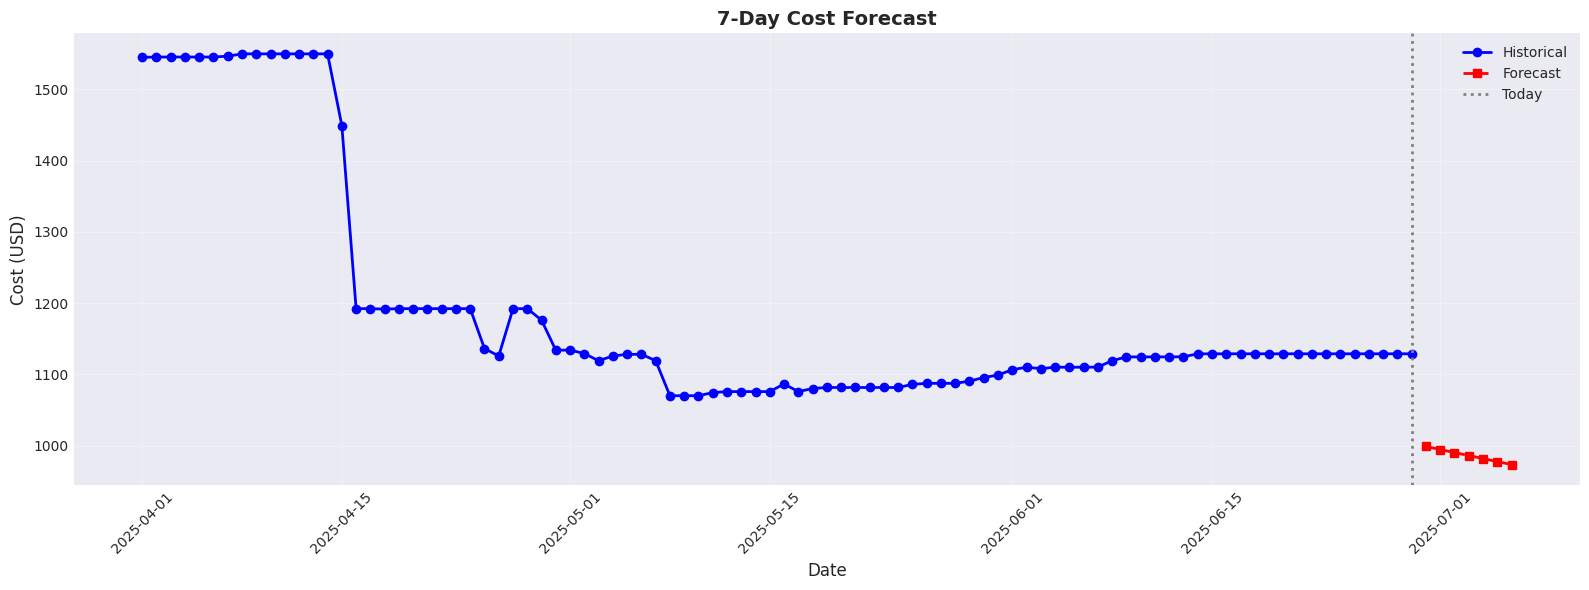

In [19]:
# Simple linear forecast for next 7 days
from sklearn.linear_model import LinearRegression

# Prepare data
daily_costs_forecast = daily_costs_sorted.copy()
daily_costs_forecast['day_num'] = range(len(daily_costs_forecast))

X = daily_costs_forecast[['day_num']].values
y = daily_costs_forecast['computedAmount'].values

# Train model
model = LinearRegression()
model.fit(X, y)

# Forecast next 7 days
future_days = np.array(range(len(daily_costs_forecast), len(daily_costs_forecast) + 7)).reshape(-1, 1)
forecast = model.predict(future_days)

last_date = daily_costs_forecast['date'].max()
forecast_dates = pd.date_range(start=last_date + timedelta(days=1), periods=7)

print("\n📊 7-Day Cost Forecast (Linear Projection):")
print("="*80)
total_forecast = 0
for date, cost in zip(forecast_dates, forecast):
    print(f"{date.strftime('%Y-%m-%d')}: ${cost:,.2f}")
    total_forecast += cost
print(f"\nForecast Total (7 days): ${total_forecast:,.2f}")
print(f"Forecast Monthly:        ${total_forecast * 30 / 7:,.2f}")

# Visualization
plt.figure(figsize=(16, 6))
plt.plot(daily_costs_forecast['date'], daily_costs_forecast['computedAmount'], 
         marker='o', label='Historical', color='blue', linewidth=2)
plt.plot(forecast_dates, forecast, marker='s', label='Forecast', 
         color='red', linestyle='--', linewidth=2)
plt.axvline(x=last_date, color='gray', linestyle=':', linewidth=2, label='Today')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Cost (USD)', fontsize=12)
plt.title('7-Day Cost Forecast', fontsize=14, fontweight='bold')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 14. Export Key Insights to CSV

In [20]:
# Export top spenders by different dimensions
print("\n📁 Exporting Key Insights:")
print("="*80)

# Top services
top_services_df = df.groupby('service')['computedAmount'].sum().reset_index()
top_services_df.columns = ['Service', 'Total_Cost']
top_services_df = top_services_df.sort_values('Total_Cost', ascending=False)
top_services_df.to_csv('../output/analysis_top_services.csv', index=False)
print(f"✅ Exported: ../output/analysis_top_services.csv ({len(top_services_df)} services)")

# Top compartments
top_compartments_df = df.groupby(['compartment_name_clean', 'compartmentPath'])['computedAmount'].sum().reset_index()
top_compartments_df.columns = ['Compartment', 'Full_Path', 'Total_Cost']
top_compartments_df = top_compartments_df.sort_values('Total_Cost', ascending=False)
top_compartments_df.to_csv('../output/analysis_top_compartments.csv', index=False)
print(f"✅ Exported: ../output/analysis_top_compartments.csv ({len(top_compartments_df)} compartments)")

# Daily costs
daily_costs_export = daily_costs_sorted[['date', 'computedAmount', 'MA3', 'MA7']]
daily_costs_export.columns = ['Date', 'Daily_Cost', 'MA_3Day', 'MA_7Day']
daily_costs_export.to_csv('../output/analysis_daily_costs.csv', index=False)
print(f"✅ Exported: ../output/analysis_daily_costs.csv ({len(daily_costs_export)} days)")

# Resource-level analysis
resource_summary = df.groupby(['resourceId', 'service', 'region_from_call2']).agg({
    'computedAmount': 'sum',
    'computedQuantity': 'sum',
    'compartment_name_clean': 'first'
}).reset_index()
resource_summary.columns = ['Resource_ID', 'Service', 'Region', 'Total_Cost', 'Total_Quantity', 'Compartment']
resource_summary = resource_summary.sort_values('Total_Cost', ascending=False)
resource_summary.to_csv('../output/analysis_resource_summary.csv', index=False)
print(f"✅ Exported: ../output/analysis_resource_summary.csv ({len(resource_summary)} resources)")

print("\n✅ All insights exported successfully!")


📁 Exporting Key Insights:
✅ Exported: ../output/analysis_top_services.csv (8 services)
✅ Exported: ../output/analysis_top_compartments.csv (2 compartments)
✅ Exported: ../output/analysis_daily_costs.csv (90 days)
✅ Exported: ../output/analysis_resource_summary.csv (48 resources)

✅ All insights exported successfully!


## 15. Custom Query Section

Use this section to run custom queries on the data:

In [21]:
# Example: Filter by specific service
# service_name = 'Compute'
# service_data = df[df['service'] == service_name]
# print(f"Total {service_name} cost: ${service_data['computedAmount'].sum():,.2f}")

# Example: Filter by date range
# start_date = '2025-11-01'
# end_date = '2025-11-10'
# date_filtered = df[(df['date'] >= start_date) & (df['date'] <= end_date)]
# print(f"Cost in date range: ${date_filtered['computedAmount'].sum():,.2f}")

# Add your custom queries here:

## Summary

This notebook provides comprehensive FinOps intelligence including:
- ✅ Executive summary with key metrics
- ✅ Cost breakdowns by service, region, and compartment
- ✅ Time series analysis and trends
- ✅ Compute and storage deep dives
- ✅ Anomaly detection
- ✅ Cost optimization opportunities
- ✅ 7-day cost forecast
- ✅ Exportable insights for reporting

### Next Steps:
1. Review anomalies and investigate root causes
2. Analyze high-cost compartments and services
3. Check Cloud Advisor recommendations: `./collector.sh <params> --only-recommendations`
4. Implement cost optimization strategies
5. Set up regular monitoring and reporting